# Time series forecasting fundementals with TensorFlow + Milestone project 3: BitPredict

Let's wrtite some TensorFlow code to predict the price of bitcoin

## Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


## importing time series with pandas

In [2]:
import pandas as pd


df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date']) # parse the date column and tell pandas column 1 is a date 
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples.

A smaller number of samples is something youll often encounter with time series data

**Note:** THe seasonality of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 becayse we collect one sample per day meaning we'll get 365 per year

In [5]:
import matplotlib.pyplot as plt

# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


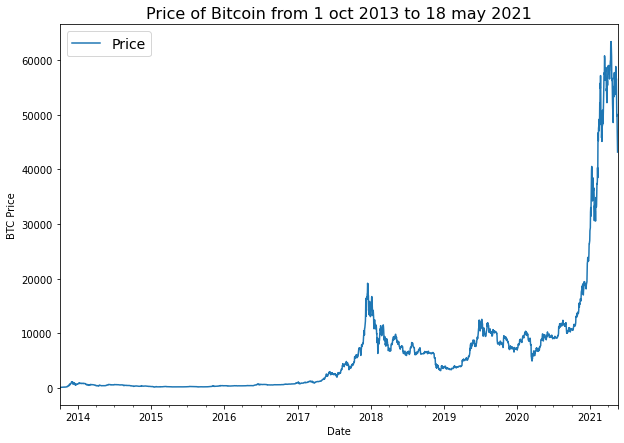

In [6]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 oct 2013 to 18 may 2021', fontsize=16)
plt.legend(fontsize=14)

## Importing time series data with Python's CSV module

In [7]:
# Importing and formatting historical Bitcoin data with Ptyhon
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', mode='r') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader) # Skip the first line
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d')) # get the dates as dates (not strings)
    btc_price.append(float(line[2]))
# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin from 1 oct 2013 to 18 may 2021')

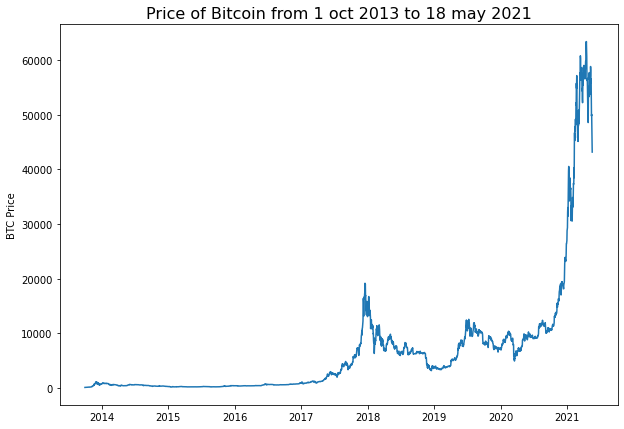

In [8]:
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 oct 2013 to 18 may 2021', fontsize=16)

## Fromat data part 1: Create train and test sets of our time series data

### Create train and test sets with time series data (the wrong way)

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2229,), (558,), (2229,), (558,))

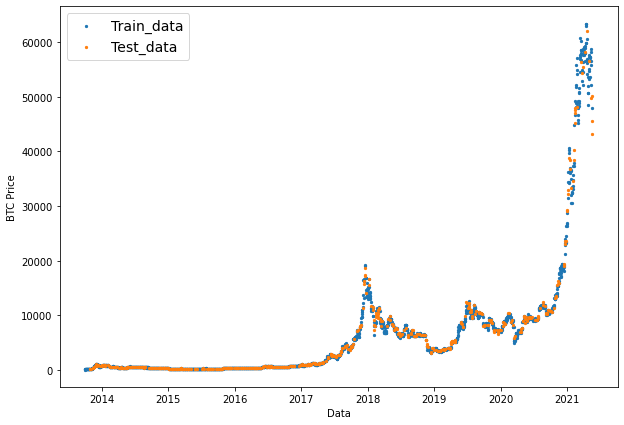

In [11]:
# Let's plot wrong train_split
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train_data')
plt.scatter(X_test, y_test, s=5, label='Test_data ')
plt.xlabel('Data')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show();

### Create train and test sets for time series (the right way)

In [12]:
# Create train and test split the right way for time series data
split_size = int(0.8*len(prices)) # Can choose the split yourself

# Create train data splits
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape

((2229,), (558,))

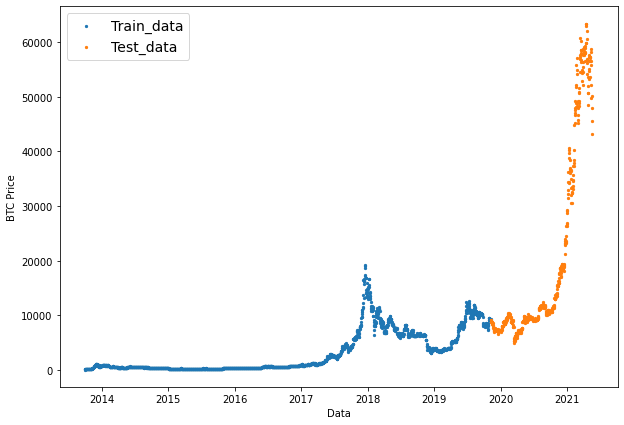

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train_data')
plt.scatter(X_test, y_test, s=5, label='Test_data ')
plt.xlabel('Data')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionize it

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plot timesteps (a series of points in time) against values (a series of values across time)
  Parameters 
  ----------
  timesteps: array of timesteps values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot
  end : where to end the plot
  label : label to show on plot about values 
  """
  # plot the series
  #plt.figure(figsize=(10, 7))
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


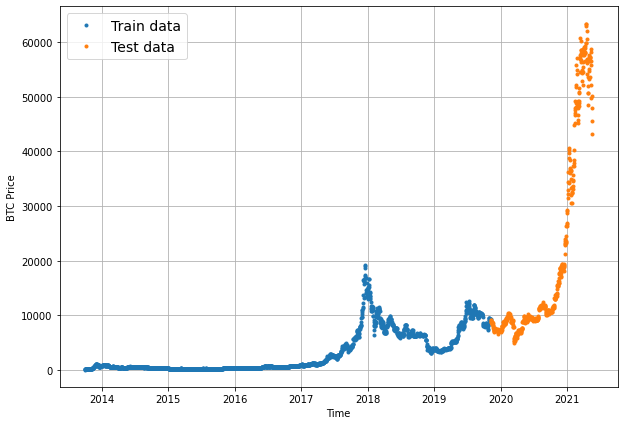

In [15]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, label='Test data')

## Modelling Experiments 

We've ghot some bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best

Terms to be familiar with:
* Horizon = number of timesteps into the future we're going to predict
* Window size = number of timesteps we're going to use to predict horizon

Modelling experiments we're running:
* 0	Naïve model (baseline)	NA	NA	NA
* 1	Dense model	1	7	NA
* 2	Same as 1	1	30	NA
* 3	Same as 1	7	30	NA
* 4	Conv1D	1	7	NA
* 5	LSTM	1	7	NA
* 6	Same as 1 (but with multivariate data)	1	7	Block reward size
* 7	N-BEATs Algorithm	1	7	NA
* 8	Ensemble (multiple models optimized on different loss functions)	1	7	NA
* 9	Future prediction model (model to predict future values)	1	7	NA
* 10	Same as 1 (but with turkey 🦃 data introduced)	1	7	NA

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$ \hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 this is for a horizon of 1

In [16]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

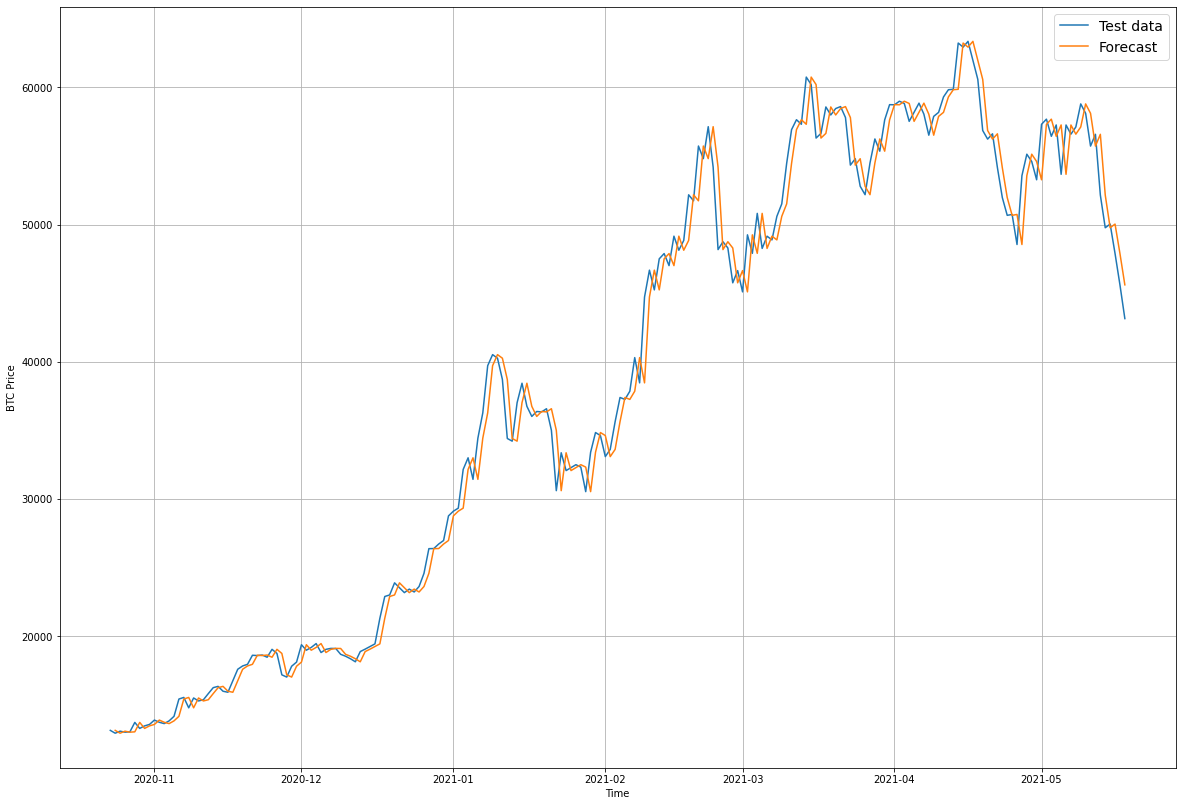

In [17]:
# Plot naive forecast 
plt.figure(figsize=(20, 14))

#plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, start=350, format='-', label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format='-', label='Forecast')

Look up the forcasting chapter of Forecasting: Principles in Practice: https://otexts.com/fpp3/simple-methods.html

### Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting

In [18]:
import tensorflow as tf

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [21]:
def evaluate_preds(y_true, y_pred):
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {
      'MAE':  mae.numpy(),
      'MSE':  mse.numpy(),
      'RMSE': rmse.numpy(),
      'MAPE': mape.numpy(),
      'MASE': mase.numpy()
  }

In [22]:
base_results = evaluate_preds(y_test[1:], naive_forecast)

### Format Data part 2: Windowing our dataset

Why do we do this?

We window our time series dataset to turn our data into a supervised learning problem.

In [23]:
btc_price[:7], btc_price[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [24]:
# Let's set up global vairable for window and horizon size
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use the past 7 days to make prediction

In [25]:
# Create function to label windowed data
def get_labeled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset

  Input: [0, 1, 2, 3, 4, 5, 6 ,7] -> output: [0, 1, 2, 3, 4, 5, 6, [7]]
  """
  return x[:, :-horizon], x[:, -horizon:]

In [26]:
# Test out the window labeling function
test_window, test_label = get_labeled_window(tf.expand_dims(tf.range(8), axis=0))
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [0 1 2 3 4 5 6] -> Label: 7


In [27]:
tf.expand_dims(tf.range(8), axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]])>

In [28]:
index = 0
temp = np.array(btc_price)
#print(len(temp[200:]))
window_array = []
label_array = []
for t in tf.expand_dims(btc_price, axis=0):
  for i in range(len(t)):
    #t = np.array(t)
    
    
    if len(t[index:index+8]) < len(t[i:]):
      window, label = get_labeled_window(tf.expand_dims(t[index:index+7], axis=0))
      #print(t[index:index+7])
      index += 1
      window_array.append(window)
      label_array.append(window)
      print(f'Window: {tf.squeeze(window).numpy()} -> Label: {tf.squeeze(label).numpy()}')
window_array

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533] -> Label: 121.79499816894531
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: 123.03299713134766
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: 124.04900360107422
Window: [118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: 125.9611587524414
Window: [121.33866 120.65533 121.795   123.033   124.049   125.96116] -> Label: 125.2796630859375
Window: [120.65533 121.795   123.033   124.049   125.96116 125.27966] -> Label: 125.92749786376953
Window: [121.795   123.033   124.049   125.96116 125.27966 125.9275 ] -> Label: 126.38333129882812
Window: [123.033   124.049   125.96116 125.27966 125.9275  126.38333] -> Label: 135.2419891357422
Window: [124.049   125.96116 125.27966 125.9275  126.38333 135.24199] -> Label: 133.2033233642578
Window: [125.96116 125.27966 125.9275  126.38333 135.24199 133.20332] -> Label: 142.76333618164062
Window: [125.2

[<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
 array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 6), dtype=float32, numpy=
 array([[125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 6), dtype=float32, numpy=
 array([[108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 6), dtype=float32, numpy=
 array([[118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 6), dtype=float32, numpy=
 array([[121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 6), dtype=float32, numpy=
 array([[120.65533, 121.795  , 123.033  , 124.049  , 125.96116, 125.27966]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 6), dtype=float32, numpy=
 array([[121.795  , 123.033  , 124.049  , 125.96116

We could do this with for loops like I did above. But he will use something better. 

https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [29]:
# Create function for sliding window
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1d array to 2d array of sequential labeled window sizes with horizon size labels
  """
  # 1. Create a window of specific size
  window_steps = np.expand_dims(np.arange(window_size+horizon), axis=0)
  
  # 2. Use numpy indexing to create 2d array of multiple window steps
  window_indexes = window_steps + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  
  #print(f'Window indexes:\n {window_indexes} {window_indexes.shape}')

  # 3. Index on the target array with 2d array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labeled windows
  windows, labels = get_labeled_window(windowed_array)
  return windows, labels


In [30]:
full_windows, full_labels = make_windows(prices)
full_windows.shape, full_labels.shape

((2780, 7), (2780, 1))

In [31]:
# View the first 3 windows with labels
for i in range(3):
  print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


### Turning windows into training and test sets

In [32]:
def make_train_test_split(windows, labels, test_split=0.2):
  
  split_size = int(len(windows) *  (1-test_split))
  train_windows = windows[:split_size]
  test_windows = windows[split_size:]
  train_labels = labels[:split_size]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels



In [33]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
train_windows.shape, train_labels.shape

((2224, 7), (2224, 1))

### Make a modelling checkpoint

In [34]:
import os
def model_checkpoint(model_name, save_path='modelling_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 smaller data -> fit more each epoch
* 100 epoch



In [35]:
from tensorflow.keras import layers

# Set random seed for a reproducible results
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

# 2. Compile our model
model_1.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 2s 25ms/step - loss: 780.3595 - mae: 780.3595 - mse: 2312877.0000 - val_loss: 2278.5544 - val_mae: 2278.5544 - val_mse: 12761642.0000
Epoch 2/100
18/18 [==============================] - 0s 15ms/step - loss: 247.8195 - mae: 247.8195 - mse: 285793.8125 - val_loss: 1008.0859 - val_mae: 1008.0859 - val_mse: 3457944.5000
Epoch 3/100
18/18 [==============================] - 0s 15ms/step - loss: 190.4361 - mae: 190.4361 - mse: 174517.2500 - val_loss: 958.1794 - val_mae: 958.1794 - val_mse: 3048660.7500
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 172.5639 - mae: 172.5639 - mse: 157133.8125 - val_loss: 901.7571 - val_mae: 901.7571 - val_mse: 2686797.7500
Epoch 5/100
18/18 [==============================] - 0s 15ms/step - loss: 163.4465 - mae: 163.4465 - mse: 142684.3750 - val_loss: 874.2380 - val_mae: 874.2380 - val_mse: 2537247.0000
Epoch 6/100
18/18 [==============================] - 0s 21ms/step - loss: 159.9

In [36]:
naive_result = evaluate_preds(y_test[1:], naive_forecast)
naive_result

{'MAE': 567.9802273457541,
 'MSE': 1147547.1250238959,
 'RMSE': 1071.2362601330744,
 'MAPE': 2.516524929982267,
 'MASE': 0.9995699939182624}

In [37]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 628.2206 - mae: 628.2206 - mse: 1285031.3750


[628.2206420898438, 628.2206420898438, 1285031.375]

In [38]:
# Load in saved best performing model?1 and evaluate it on test data
model_1_load = tf.keras.models.load_model('modelling_experiments/model_1_dense')
model_1_load.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 568.6201 - mae: 568.6201 - mse: 1173581.0000


[568.6201171875, 568.6201171875, 1173581.0]

### Making forecast with a model

In [39]:
def make_preds(model, input_data):

  preds = model.predict(input_data)
  return tf.squeeze(preds)

In [40]:
model_1_preds = make_preds(model_1_load, test_windows)
len(model_1_preds), model_1_preds[:10]

(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8867.542, 8786.035, 9033.619, 8815.394, 8735.166, 8747.36 ,
        8699.179, 8511.771, 8477.654, 8530.005], dtype=float32)>)

In [41]:
model_1_result = evaluate_preds(y_true=tf.cast(tf.squeeze(test_labels), dtype=tf.float32), y_pred=model_1_preds)
model_1_result

{'MAE': 568.6202,
 'MSE': 1173581.1,
 'RMSE': 1083.3195,
 'MAPE': 2.544373,
 'MASE': 0.99890816}

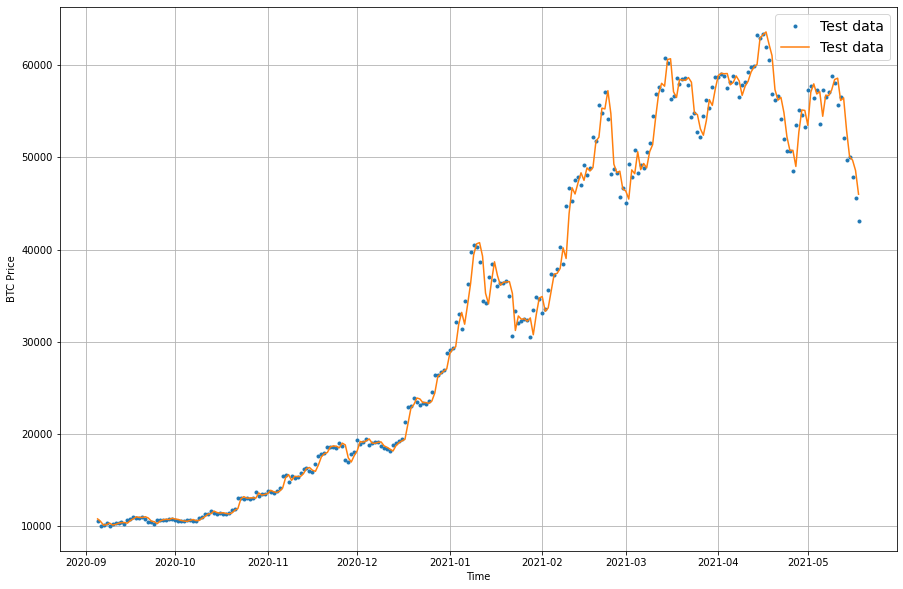

In [42]:
# Let's plot our model 1 predictions
offset = 300
plt.figure(figsize=(15, 10))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, label='Test data', format='-')

## Model 2: Same as 1 but with window size = 30 horizon = 1

### Starting with making windows again with different size

In [43]:
full_windows_30, full_labels_30 = make_windows(prices, window_size=30)
full_windows.shape, full_labels.shape, len(full_windows_30)

((2780, 7), (2780, 1), 2757)

In [44]:
train_windows_2, test_windows_2, train_labels_2, test_labels_2 = make_train_test_split(full_windows_30, full_labels_30)
train_windows_2.shape, train_labels_2.shape

((2205, 30), (2205, 1))

### Building the model

In [45]:
model_2 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(1, activation='linear')
], name='Model_2_window_30')

model_2.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer='adam',
                metrics=['mae', 'mse'])

model_2.fit(x=train_windows_2,
            y=train_labels_2,
            epochs=100,
            validation_data=(test_windows_2, test_labels_2),
            batch_size=128,
            callbacks=[model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 0s 20ms/step - loss: 1355.6908 - mae: 1355.6908 - mse: 7234115.5000 - val_loss: 3229.5042 - val_mae: 3229.5042 - val_mse: 25155972.0000
Epoch 2/100
18/18 [==============================] - 0s 16ms/step - loss: 438.6800 - mae: 438.6800 - mse: 826609.6250 - val_loss: 2069.9329 - val_mae: 2069.9329 - val_mse: 11734869.0000
Epoch 3/100
18/18 [==============================] - 0s 17ms/step - loss: 322.9372 - mae: 322.9372 - mse: 475441.3438 - val_loss: 1435.9474 - val_mae: 1435.9474 - val_mse: 6231541.0000
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 273.7036 - mae: 273.7036 - mse: 349853.2188 - val_loss: 1318.3124 - val_mae: 1318.3124 - val_mse: 5223727.5000
Epoch 5/100
18/18 [==============================] - 0s 16ms/step - loss: 231.0898 - mae: 231.0898 - mse: 259314.2656 - val_loss: 1199.7698 - val_mae: 1199.7698 - val_mse: 4319365.5000
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - los

In [46]:
model_2_load = tf.keras.models.load_model('modelling_experiments/Model_2_window_30')
model_2_load.evaluate(test_windows_2, test_labels_2)

18/18 [==============================] - 0s 1ms/step - loss: 601.3160 - mae: 601.3160 - mse: 1238714.8750


[601.3159790039062, 601.3159790039062, 1238714.875]

In [47]:
# Get the forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows_2)

In [48]:
model_2_results = evaluate_preds(y_true=tf.cast(tf.squeeze(test_labels_2), dtype=tf.float32), y_pred=model_2_preds)
base_results, model_1_result, model_2_results

({'MAE': 567.9802273457541,
  'MSE': 1147547.1250238959,
  'RMSE': 1071.2362601330744,
  'MAPE': 2.516524929982267,
  'MASE': 0.9995699939182624},
 {'MAE': 568.6202,
  'MSE': 1173581.1,
  'RMSE': 1083.3195,
  'MAPE': 2.544373,
  'MASE': 0.99890816},
 {'MAE': 609.33563,
  'MSE': 1267452.0,
  'RMSE': 1125.8116,
  'MAPE': 2.7565584,
  'MASE': 1.0651246})

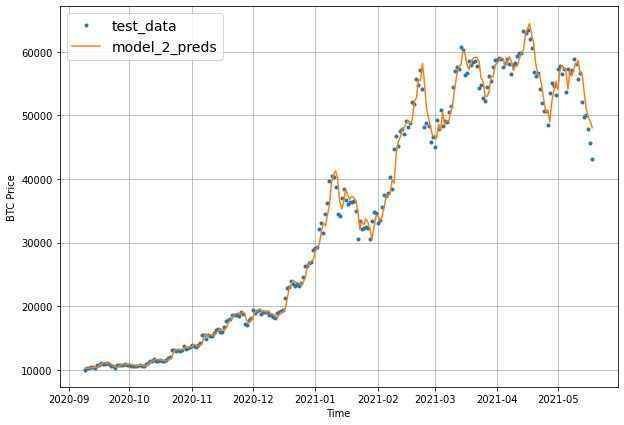

In [49]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows_2):], values=test_labels_2[:, 0], start=offset, label='test_data')
plot_time_series(timesteps=X_test[-len(test_windows_2):], values=model_2_preds, start=offset, format='-', label='model_2_preds')

## Model 3: Dense (window = 30, horizon = 7)

### First make the window and horizon and split the dataset into train and test sets

In [50]:
HORIZON = 7
WINDOW_SIZE = 30

In [51]:
prices[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [52]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels), full_windows.shape, full_labels.shape

(2751, 2751, (2751, 36), (2751, 1))

In [53]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), train_windows.shape, test_labels.shape

(2200, 551, (2200, 36), (551, 1))

### Make the model

In [54]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON, activation='linear')
], name='model_3_dense')

model_3.compile(loss='MAE',
                optimizer='adam',
                metrics=['mae', 'mse'])

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: modelling_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: modelling_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: modelling_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: modelling_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: modelling_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: modelling_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: modelling_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: modelling_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: modelling_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: modelling_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: modelling_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: modelling_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: modelling_experiments\model_3

In [55]:
model_3_load = tf.keras.models.load_model('modelling_experiments/model_3_dense')

In [56]:
model_3_load.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 643.8071 - mae: 643.8071 - mse: 1373343.0000


[643.80712890625, 643.80712890625, 1373343.0]

In [57]:
model_3_preds = make_preds(model_3, input_data=test_windows)
model_3_preds[:5 ]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[8438.704 , 8558.119 , 8526.581 , 8599.166 , 8623.328 , 8569.237 ,
        8509.606 ],
       [8576.057 , 8613.833 , 8627.293 , 8599.697 , 8518.849 , 8564.049 ,
        8595.192 ],
       [8613.966 , 8534.997 , 8595.444 , 8436.144 , 8465.498 , 8463.849 ,
        8496.867 ],
       [8421.966 , 8134.906 , 8125.4136, 8224.364 , 8176.093 , 8151.003 ,
        8107.457 ],
       [8398.933 , 8154.867 , 8059.3047, 8117.579 , 8341.413 , 8226.972 ,
        8148.427 ]], dtype=float32)>

In [58]:
test_labels.shape, model_3_preds.shape

((551, 1), TensorShape([551, 7]))

### Make our evaluate pred function work with multiple dimensions

In [59]:

def evaluate_preds(y_true, y_pred):
  
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)




  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

 
  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single variable)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  
  return {
      'MAE':  mae.numpy(),
      'MSE':  mse.numpy(),
      'RMSE': rmse.numpy(),
      'MAPE': mape.numpy(),
      'MASE': mase.numpy()
  }

In [60]:
model_3_results = evaluate_preds(y_true=tf.cast(test_labels, dtype=tf.float32),
                                 y_pred=model_3_preds)
model_3_results

{'MAE': 707.1947,
 'MSE': 1551039.0,
 'RMSE': 734.7204,
 'MAPE': 3.2422078,
 'MASE': 1.2343022}

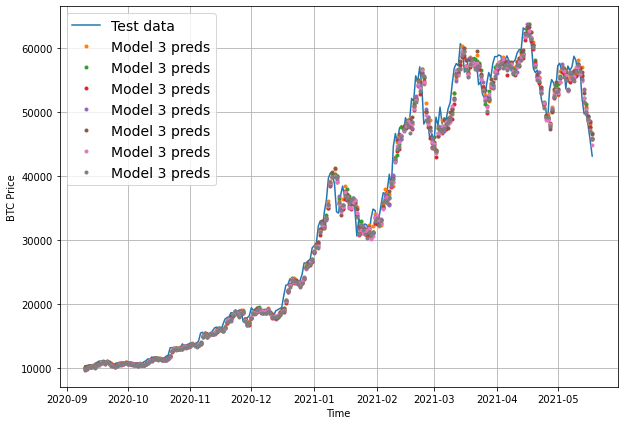

In [61]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format='-', start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="Model 3 preds")  

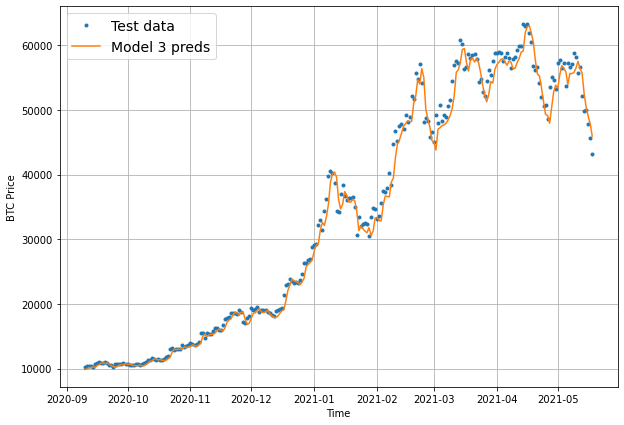

In [62]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format='-',
                 start=offset, 
                 label="Model 3 preds") 

In [63]:
model_1_result, model_2_results, model_3_results

({'MAE': 568.6202,
  'MSE': 1173581.1,
  'RMSE': 1083.3195,
  'MAPE': 2.544373,
  'MASE': 0.99890816},
 {'MAE': 609.33563,
  'MSE': 1267452.0,
  'RMSE': 1125.8116,
  'MAPE': 2.7565584,
  'MASE': 1.0651246},
 {'MAE': 707.1947,
  'MSE': 1551039.0,
  'RMSE': 734.7204,
  'MAPE': 3.2422078,
  'MASE': 1.2343022})

### Which of our models is performing the best?

Let us compare the model results we have

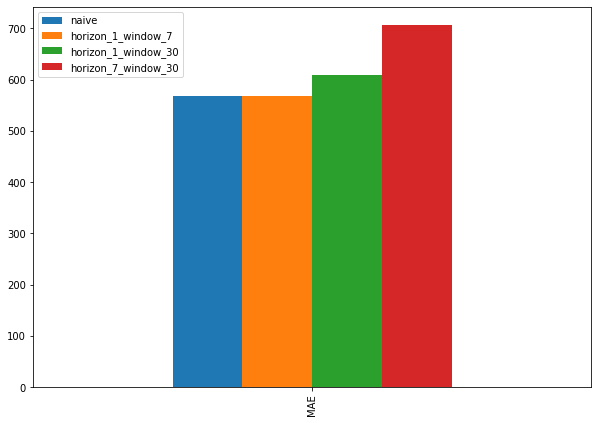

In [64]:
pd.DataFrame({"naive": naive_result["MAE"],
              "horizon_1_window_7": model_1_result["MAE"],
              "horizon_1_window_30": model_2_results["MAE"],
              "horizon_7_window_30": model_3_results["MAE"]}, index=["MAE"]).plot(figsize=(10, 7), kind="bar");

## Model 4: Conv1D

In [65]:
HORIZON = 1
WINDOW_SIZE = 7

In [66]:
# Create a windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [67]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
test_labels.shape, test_labels[:5]

((556, 1),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

### Changing the data to fit Conv1D

To use the conv1D layer, we need an input shape of: (batch_size, timesteps, input_dim)... However our data isn't in that shape yet.

In [68]:
# Check data input shape
train_windows.shape, train_labels.shape

((2224, 7), (2224, 1))

In [69]:
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [70]:
# Before we pass our data to the conv1D layer we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [71]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add another dimension to our "input_dim"

In [72]:
expand_dims_layer 

In [73]:
# Test out our lambda layer
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original valus with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original valus with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


### Making the model

In [74]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
              #layers.Input(shape=(2224, 7)),
              expand_dims_layer,
              layers.Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'),
              #layers.MaxPool1D(),
              layers.Dense(1)                 
], name='model_4_conv1d')

model_4.compile(loss=tf.losses.mean_absolute_error,
                optimizer='adam',
                metrics=['mae', 'mse'])

#model_4.summary()

In [75]:
model_4.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            validation_data=(test_windows, test_labels),
            batch_size=128,
            callbacks=[model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - 5s 30ms/step - loss: 1361.8898 - mae: 1361.8898 - mse: 6292957.5000 - val_loss: 1742.1072 - val_mae: 1742.1072 - val_mse: 8527807.0000
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 329.7489 - mae: 329.7489 - mse: 442957.3438 - val_loss: 1775.1019 - val_mae: 1775.1019 - val_mse: 7600292.5000
Epoch 3/100
18/18 [==============================] - 0s 21ms/step - loss: 218.6827 - mae: 218.6827 - mse: 241579.6250 - val_loss: 1241.7854 - val_mae: 1241.7854 - val_mse: 4422400.5000
Epoch 4/100
18/18 [==============================] - 0s 21ms/step - loss: 196.0234 - mae: 196.0234 - mse: 197899.1094 - val_loss: 1085.5247 - val_mae: 1085.5247 - val_mse: 3818766.2500
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 193.1587 - mae: 193.1587 - mse: 197033.3594 - val_loss: 1086.4137 - val_mae: 1086.4137 - val_mse: 3754781.7500
Epoch 6/100
18/18 [==============================] - 0s 21ms/step - loss: 

In [76]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Evaluate the model
model_4_load = tf.keras.models.load_model('modelling_experiments/model_4_conv1d')
model_4_load.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 569.1124 - mae: 569.1124 - mse: 1179504.1250


[569.1124267578125, 569.1124267578125, 1179504.125]

In [78]:
model_4_preds = make_preds(model_4_load, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8901.926, 8803.818, 9024.455, 8817.035, 8757.269, 8743.859,
       8702.482, 8546.325, 8478.114, 8534.269], dtype=float32)>

In [79]:
mae = tf.keras.metrics.mean_absolute_error(y_true=test_labels, y_pred=model_4_preds)
tf.reduce_mean(mae)

<tf.Tensor: shape=(), dtype=float32, numpy=17157.482>

In [80]:
model_4_results = evaluate_preds(y_true=tf.cast(tf.squeeze(test_labels), dtype=tf.float32),
                                 y_pred=model_4_preds)
model_4_results

{'MAE': 569.1124,
 'MSE': 1179504.1,
 'RMSE': 1086.0498,
 'MAPE': 2.5501475,
 'MASE': 0.9997729}

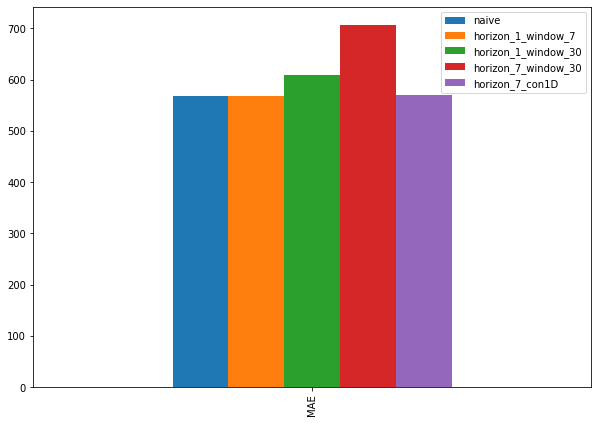

In [81]:
pd.DataFrame({"naive": naive_result["MAE"],
              "horizon_1_window_7": model_1_result["MAE"],
              "horizon_1_window_30": model_2_results["MAE"],
              "horizon_7_window_30": model_3_results["MAE"],
              "horizon_7_con1D": model_4_results}, index=["MAE"]).plot(figsize=(10, 7), kind="bar");

## Model 5: LSTM

In [82]:
# Making the model
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                               layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                               layers.LSTM(128),
                               layers.Dense(1)
], name='model_5_LSTM')

model_5.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer='adam',
                metrics=['mae'])

model_5.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            validation_data=(test_windows, test_labels),
            batch_size=128,
            callbacks=[model_checkpoint(model_5.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 3129.2651 - mae: 3129.2651

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 6s 124ms/step - loss: 3156.9011 - mae: 3156.9011 - val_loss: 20093.8301 - val_mae: 20093.8301
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 3195.8416 - mae: 3195.8416

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 3155.2678 - mae: 3155.2678 - val_loss: 20092.6328 - val_mae: 20092.6328
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 3171.3301 - mae: 3171.3301

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 119ms/step - loss: 3154.3145 - mae: 3154.3145 - val_loss: 20091.9648 - val_mae: 20091.9648
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 3165.4651 - mae: 3165.4651

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 3153.6353 - mae: 3153.6353 - val_loss: 20091.1641 - val_mae: 20091.1641
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 3175.3843 - mae: 3175.3843

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 121ms/step - loss: 3152.8452 - mae: 3152.8452 - val_loss: 20090.4277 - val_mae: 20090.4277
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 3179.2046 - mae: 3179.2046

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 3152.1426 - mae: 3152.1426 - val_loss: 20089.7402 - val_mae: 20089.7402
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 3347.1021 - mae: 3347.1021

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 114ms/step - loss: 3151.4331 - mae: 3151.4331 - val_loss: 20088.9922 - val_mae: 20088.9922
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 3120.8240 - mae: 3120.8240

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 3150.5266 - mae: 3150.5266 - val_loss: 20087.9160 - val_mae: 20087.9160
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 3149.5520 - mae: 3149.5520

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 123ms/step - loss: 3149.5520 - mae: 3149.5520 - val_loss: 20087.0977 - val_mae: 20087.0977
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 3148.7629 - mae: 3148.7629

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 3148.7629 - mae: 3148.7629 - val_loss: 20086.3242 - val_mae: 20086.3242
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 3124.6995 - mae: 3124.6995

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 3147.9990 - mae: 3147.9990 - val_loss: 20085.5703 - val_mae: 20085.5703
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 3147.2517 - mae: 3147.2517

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 3147.2517 - mae: 3147.2517 - val_loss: 20084.8281 - val_mae: 20084.8281
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 3158.1492 - mae: 3158.1492

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 114ms/step - loss: 3146.4883 - mae: 3146.4883 - val_loss: 20084.0430 - val_mae: 20084.0430
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 3145.7148 - mae: 3145.7148

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 3145.7148 - mae: 3145.7148 - val_loss: 20083.2793 - val_mae: 20083.2793
Epoch 15/100
15/18 [========================>.....] - ETA: 0s - loss: 3127.9531 - mae: 3127.9531

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 118ms/step - loss: 3144.8157 - mae: 3144.8157 - val_loss: 20082.3398 - val_mae: 20082.3398
Epoch 16/100
15/18 [========================>.....] - ETA: 0s - loss: 3173.1804 - mae: 3173.1804

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 3144.0032 - mae: 3144.0032 - val_loss: 20081.5566 - val_mae: 20081.5566
Epoch 17/100
12/18 [===================>..........] - ETA: 0s - loss: 3187.3289 - mae: 3187.3289

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 117ms/step - loss: 3143.2258 - mae: 3143.2258 - val_loss: 20080.7832 - val_mae: 20080.7832
Epoch 18/100
14/18 [======================>.......] - ETA: 0s - loss: 3219.2407 - mae: 3219.2407

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 3142.4595 - mae: 3142.4595 - val_loss: 20080.0254 - val_mae: 20080.0254
Epoch 19/100
16/18 [=========================>....] - ETA: 0s - loss: 3153.7971 - mae: 3153.7971

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 114ms/step - loss: 3141.7014 - mae: 3141.7014 - val_loss: 20079.2695 - val_mae: 20079.2695
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 3147.2126 - mae: 3147.2126

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3140.9497 - mae: 3140.9497 - val_loss: 20078.5215 - val_mae: 20078.5215
Epoch 21/100
11/18 [=================>............] - ETA: 0s - loss: 3250.1282 - mae: 3250.1282

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 3140.2024 - mae: 3140.2024 - val_loss: 20077.7773 - val_mae: 20077.7773
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 3155.5200 - mae: 3155.5200

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 3139.4587 - mae: 3139.4587 - val_loss: 20077.0332 - val_mae: 20077.0332
Epoch 23/100
 9/18 [==============>...............] - ETA: 0s - loss: 3129.3140 - mae: 3129.3140

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 3138.7185 - mae: 3138.7185 - val_loss: 20076.2969 - val_mae: 20076.2969
Epoch 24/100
 9/18 [==============>...............] - ETA: 0s - loss: 3003.3042 - mae: 3003.3042

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 119ms/step - loss: 3137.9814 - mae: 3137.9814 - val_loss: 20075.5605 - val_mae: 20075.5605
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 3192.1497 - mae: 3192.1497

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 3137.2458 - mae: 3137.2458 - val_loss: 20074.8262 - val_mae: 20074.8262
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 3136.5127 - mae: 3136.5127

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3136.5127 - mae: 3136.5127 - val_loss: 20074.0957 - val_mae: 20074.0957
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 3196.3704 - mae: 3196.3704

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 3135.7822 - mae: 3135.7822 - val_loss: 20073.3633 - val_mae: 20073.3633
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 2792.0125 - mae: 2792.0125

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 114ms/step - loss: 3135.0525 - mae: 3135.0525 - val_loss: 20072.6348 - val_mae: 20072.6348
Epoch 29/100
 7/18 [==========>...................] - ETA: 0s - loss: 3052.2427 - mae: 3052.2427

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 3134.3247 - mae: 3134.3247 - val_loss: 20071.9102 - val_mae: 20071.9102
Epoch 30/100
13/18 [====================>.........] - ETA: 0s - loss: 3091.4893 - mae: 3091.4893

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 119ms/step - loss: 3133.5979 - mae: 3133.5979 - val_loss: 20071.1816 - val_mae: 20071.1816
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 3092.7278 - mae: 3092.7278

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 3132.8723 - mae: 3132.8723 - val_loss: 20070.4570 - val_mae: 20070.4570
Epoch 32/100
12/18 [===================>..........] - ETA: 0s - loss: 3122.0090 - mae: 3122.0090

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 117ms/step - loss: 3132.1482 - mae: 3132.1482 - val_loss: 20069.7344 - val_mae: 20069.7344
Epoch 33/100
12/18 [===================>..........] - ETA: 0s - loss: 3099.0889 - mae: 3099.0889

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 3131.4248 - mae: 3131.4248 - val_loss: 20069.0117 - val_mae: 20069.0117
Epoch 34/100
16/18 [=========================>....] - ETA: 0s - loss: 3113.7871 - mae: 3113.7871

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 3130.7026 - mae: 3130.7026 - val_loss: 20068.2871 - val_mae: 20068.2871
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 2926.7097 - mae: 2926.7097

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 109ms/step - loss: 3129.9814 - mae: 3129.9814 - val_loss: 20067.5684 - val_mae: 20067.5684
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 3687.1853 - mae: 3687.1853

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3129.2603 - mae: 3129.2603 - val_loss: 20066.8477 - val_mae: 20066.8477
Epoch 37/100
14/18 [======================>.......] - ETA: 0s - loss: 3121.7566 - mae: 3121.7566

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 3128.5408 - mae: 3128.5408 - val_loss: 20066.1289 - val_mae: 20066.1289
Epoch 38/100
14/18 [======================>.......] - ETA: 0s - loss: 3200.4128 - mae: 3200.4128

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 119ms/step - loss: 3127.7861 - mae: 3127.7861 - val_loss: 20065.3398 - val_mae: 20065.3398
Epoch 39/100
14/18 [======================>.......] - ETA: 0s - loss: 3134.3826 - mae: 3134.3826

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 111ms/step - loss: 3127.0061 - mae: 3127.0061 - val_loss: 20064.5664 - val_mae: 20064.5664
Epoch 40/100
14/18 [======================>.......] - ETA: 0s - loss: 3159.3601 - mae: 3159.3601

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 101ms/step - loss: 3126.2358 - mae: 3126.2358 - val_loss: 20063.8008 - val_mae: 20063.8008
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 3025.2827 - mae: 3025.2827

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 3125.4744 - mae: 3125.4744 - val_loss: 20063.0430 - val_mae: 20063.0430
Epoch 42/100
13/18 [====================>.........] - ETA: 0s - loss: 3108.3479 - mae: 3108.3479

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 3124.7195 - mae: 3124.7195 - val_loss: 20062.2910 - val_mae: 20062.2910
Epoch 43/100
18/18 [==============================] - ETA: 0s - loss: 3123.9685 - mae: 3123.9685

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 122ms/step - loss: 3123.9685 - mae: 3123.9685 - val_loss: 20061.5430 - val_mae: 20061.5430
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 2526.6714 - mae: 2526.6714

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3123.2207 - mae: 3123.2207 - val_loss: 20060.7969 - val_mae: 20060.7969
Epoch 45/100
13/18 [====================>.........] - ETA: 0s - loss: 3086.0115 - mae: 3086.0115

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 117ms/step - loss: 3122.4758 - mae: 3122.4758 - val_loss: 20060.0527 - val_mae: 20060.0527
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 2755.0815 - mae: 2755.0815

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 98ms/step - loss: 3121.7332 - mae: 3121.7332 - val_loss: 20059.3086 - val_mae: 20059.3086
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 3172.2908 - mae: 3172.2908

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 112ms/step - loss: 3120.9912 - mae: 3120.9912 - val_loss: 20058.5703 - val_mae: 20058.5703
Epoch 48/100
14/18 [======================>.......] - ETA: 0s - loss: 3036.6848 - mae: 3036.6848

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3120.2515 - mae: 3120.2515 - val_loss: 20057.8301 - val_mae: 20057.8301
Epoch 49/100
14/18 [======================>.......] - ETA: 0s - loss: 3052.0481 - mae: 3052.0481

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3119.5129 - mae: 3119.5129 - val_loss: 20057.0918 - val_mae: 20057.0918
Epoch 50/100
14/18 [======================>.......] - ETA: 0s - loss: 3083.9216 - mae: 3083.9216

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3118.7756 - mae: 3118.7756 - val_loss: 20056.3555 - val_mae: 20056.3555
Epoch 51/100
10/18 [===============>..............] - ETA: 0s - loss: 2983.3657 - mae: 2983.3657

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3118.0391 - mae: 3118.0391 - val_loss: 20055.6211 - val_mae: 20055.6211
Epoch 52/100
14/18 [======================>.......] - ETA: 0s - loss: 3119.2380 - mae: 3119.2380

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 111ms/step - loss: 3117.3037 - mae: 3117.3037 - val_loss: 20054.8848 - val_mae: 20054.8848
Epoch 53/100
14/18 [======================>.......] - ETA: 0s - loss: 3088.7590 - mae: 3088.7590

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 3116.5691 - mae: 3116.5691 - val_loss: 20054.1504 - val_mae: 20054.1504
Epoch 54/100
14/18 [======================>.......] - ETA: 0s - loss: 3138.0535 - mae: 3138.0535

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 3115.8352 - mae: 3115.8352 - val_loss: 20053.4180 - val_mae: 20053.4180
Epoch 55/100
12/18 [===================>..........] - ETA: 0s - loss: 3200.4846 - mae: 3200.4846

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 3115.1021 - mae: 3115.1021 - val_loss: 20052.6836 - val_mae: 20052.6836
Epoch 56/100
14/18 [======================>.......] - ETA: 0s - loss: 3109.6519 - mae: 3109.6519

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3114.3696 - mae: 3114.3696 - val_loss: 20051.9531 - val_mae: 20051.9531
Epoch 57/100
14/18 [======================>.......] - ETA: 0s - loss: 3063.2512 - mae: 3063.2512

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 3113.6379 - mae: 3113.6379 - val_loss: 20051.2227 - val_mae: 20051.2227
Epoch 58/100
14/18 [======================>.......] - ETA: 0s - loss: 3116.6990 - mae: 3116.6990

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3112.9067 - mae: 3112.9067 - val_loss: 20050.4883 - val_mae: 20050.4883
Epoch 59/100
14/18 [======================>.......] - ETA: 0s - loss: 3142.2307 - mae: 3142.2307

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3112.1755 - mae: 3112.1755 - val_loss: 20049.7598 - val_mae: 20049.7598
Epoch 60/100
14/18 [======================>.......] - ETA: 0s - loss: 3194.0054 - mae: 3194.0054

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3111.4004 - mae: 3111.4004 - val_loss: 20048.8477 - val_mae: 20048.8477
Epoch 61/100
14/18 [======================>.......] - ETA: 0s - loss: 3122.5903 - mae: 3122.5903

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3110.4988 - mae: 3110.4988 - val_loss: 20048.0430 - val_mae: 20048.0430
Epoch 62/100
14/18 [======================>.......] - ETA: 0s - loss: 3130.3445 - mae: 3130.3445

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3109.6450 - mae: 3109.6450 - val_loss: 20047.1406 - val_mae: 20047.1406
Epoch 63/100
14/18 [======================>.......] - ETA: 0s - loss: 3113.4192 - mae: 3113.4192

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3108.7712 - mae: 3108.7712 - val_loss: 20046.2910 - val_mae: 20046.2910
Epoch 64/100
14/18 [======================>.......] - ETA: 0s - loss: 3132.1545 - mae: 3132.1545

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3107.9321 - mae: 3107.9321 - val_loss: 20045.4648 - val_mae: 20045.4648
Epoch 65/100
15/18 [========================>.....] - ETA: 0s - loss: 3083.0337 - mae: 3083.0337

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 98ms/step - loss: 3107.1096 - mae: 3107.1096 - val_loss: 20044.6484 - val_mae: 20044.6484
Epoch 66/100
14/18 [======================>.......] - ETA: 0s - loss: 3143.7834 - mae: 3143.7834

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3106.2991 - mae: 3106.2991 - val_loss: 20043.8418 - val_mae: 20043.8418
Epoch 67/100
14/18 [======================>.......] - ETA: 0s - loss: 3119.2244 - mae: 3119.2244

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3105.4958 - mae: 3105.4958 - val_loss: 20043.0430 - val_mae: 20043.0430
Epoch 68/100
14/18 [======================>.......] - ETA: 0s - loss: 3136.3594 - mae: 3136.3594

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3104.6987 - mae: 3104.6987 - val_loss: 20042.2480 - val_mae: 20042.2480
Epoch 69/100
14/18 [======================>.......] - ETA: 0s - loss: 3155.1843 - mae: 3155.1843

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 111ms/step - loss: 3103.9067 - mae: 3103.9067 - val_loss: 20041.4590 - val_mae: 20041.4590
Epoch 70/100
14/18 [======================>.......] - ETA: 0s - loss: 3162.2771 - mae: 3162.2771

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 3103.1184 - mae: 3103.1184 - val_loss: 20040.6719 - val_mae: 20040.6719
Epoch 71/100
14/18 [======================>.......] - ETA: 0s - loss: 3110.5195 - mae: 3110.5195

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3102.3333 - mae: 3102.3333 - val_loss: 20039.8887 - val_mae: 20039.8887
Epoch 72/100
14/18 [======================>.......] - ETA: 0s - loss: 3077.6145 - mae: 3077.6145

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3101.5513 - mae: 3101.5513 - val_loss: 20039.1074 - val_mae: 20039.1074
Epoch 73/100
14/18 [======================>.......] - ETA: 0s - loss: 3107.2644 - mae: 3107.2644

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 3100.7712 - mae: 3100.7712 - val_loss: 20038.3281 - val_mae: 20038.3281
Epoch 74/100
14/18 [======================>.......] - ETA: 0s - loss: 3061.7988 - mae: 3061.7988

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3099.9929 - mae: 3099.9929 - val_loss: 20037.5527 - val_mae: 20037.5527
Epoch 75/100
14/18 [======================>.......] - ETA: 0s - loss: 3066.1836 - mae: 3066.1836

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3099.2170 - mae: 3099.2170 - val_loss: 20036.7773 - val_mae: 20036.7773
Epoch 76/100
15/18 [========================>.....] - ETA: 0s - loss: 3134.2581 - mae: 3134.2581

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 3098.4426 - mae: 3098.4426 - val_loss: 20036.0039 - val_mae: 20036.0039
Epoch 77/100
14/18 [======================>.......] - ETA: 0s - loss: 3094.6138 - mae: 3094.6138

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3097.6697 - mae: 3097.6697 - val_loss: 20035.2305 - val_mae: 20035.2305
Epoch 78/100
14/18 [======================>.......] - ETA: 0s - loss: 3111.2417 - mae: 3111.2417

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3096.8984 - mae: 3096.8984 - val_loss: 20034.4609 - val_mae: 20034.4609
Epoch 79/100
14/18 [======================>.......] - ETA: 0s - loss: 3062.1707 - mae: 3062.1707

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 117ms/step - loss: 3096.1282 - mae: 3096.1282 - val_loss: 20033.6914 - val_mae: 20033.6914
Epoch 80/100
11/18 [=================>............] - ETA: 0s - loss: 3170.1470 - mae: 3170.1470

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 3095.3591 - mae: 3095.3591 - val_loss: 20032.9199 - val_mae: 20032.9199
Epoch 81/100
14/18 [======================>.......] - ETA: 0s - loss: 3054.8977 - mae: 3054.8977

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3094.5911 - mae: 3094.5911 - val_loss: 20032.1562 - val_mae: 20032.1562
Epoch 82/100
14/18 [======================>.......] - ETA: 0s - loss: 3115.5024 - mae: 3115.5024

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 3093.8237 - mae: 3093.8237 - val_loss: 20031.3887 - val_mae: 20031.3887
Epoch 83/100
14/18 [======================>.......] - ETA: 0s - loss: 3054.4167 - mae: 3054.4167

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3093.0579 - mae: 3093.0579 - val_loss: 20030.6211 - val_mae: 20030.6211
Epoch 84/100
14/18 [======================>.......] - ETA: 0s - loss: 3130.5261 - mae: 3130.5261

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 3092.2922 - mae: 3092.2922 - val_loss: 20029.8555 - val_mae: 20029.8555
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 3200.8853 - mae: 3200.8853

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 114ms/step - loss: 3091.5276 - mae: 3091.5276 - val_loss: 20029.0918 - val_mae: 20029.0918
Epoch 86/100
 1/18 [>.............................] - ETA: 0s - loss: 3360.8008 - mae: 3360.8008

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 97ms/step - loss: 3090.7639 - mae: 3090.7639 - val_loss: 20028.3281 - val_mae: 20028.3281
Epoch 87/100
14/18 [======================>.......] - ETA: 0s - loss: 3120.7063 - mae: 3120.7063

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3090.0007 - mae: 3090.0007 - val_loss: 20027.5645 - val_mae: 20027.5645
Epoch 88/100
15/18 [========================>.....] - ETA: 0s - loss: 3156.2634 - mae: 3156.2634

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 112ms/step - loss: 3089.2383 - mae: 3089.2383 - val_loss: 20026.8008 - val_mae: 20026.8008
Epoch 89/100
14/18 [======================>.......] - ETA: 0s - loss: 3030.3025 - mae: 3030.3025

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 101ms/step - loss: 3088.4761 - mae: 3088.4761 - val_loss: 20026.0391 - val_mae: 20026.0391
Epoch 90/100
12/18 [===================>..........] - ETA: 0s - loss: 3115.8284 - mae: 3115.8284

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 119ms/step - loss: 3087.7151 - mae: 3087.7151 - val_loss: 20025.2793 - val_mae: 20025.2793
Epoch 91/100
12/18 [===================>..........] - ETA: 0s - loss: 3045.8164 - mae: 3045.8164

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 3086.9546 - mae: 3086.9546 - val_loss: 20024.5195 - val_mae: 20024.5195
Epoch 92/100
10/18 [===============>..............] - ETA: 0s - loss: 3058.6543 - mae: 3058.6543

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 117ms/step - loss: 3086.1941 - mae: 3086.1941 - val_loss: 20023.7578 - val_mae: 20023.7578
Epoch 93/100
15/18 [========================>.....] - ETA: 0s - loss: 3129.4504 - mae: 3129.4504

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3085.4346 - mae: 3085.4346 - val_loss: 20023.0000 - val_mae: 20023.0000
Epoch 94/100
15/18 [========================>.....] - ETA: 0s - loss: 3084.3579 - mae: 3084.3579

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 3084.6753 - mae: 3084.6753 - val_loss: 20022.2402 - val_mae: 20022.2402
Epoch 95/100
15/18 [========================>.....] - ETA: 0s - loss: 3045.8093 - mae: 3045.8093

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3083.9165 - mae: 3083.9165 - val_loss: 20021.4824 - val_mae: 20021.4824
Epoch 96/100
14/18 [======================>.......] - ETA: 0s - loss: 3043.2671 - mae: 3043.2671

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 3083.1582 - mae: 3083.1582 - val_loss: 20020.7227 - val_mae: 20020.7227
Epoch 97/100
15/18 [========================>.....] - ETA: 0s - loss: 3062.0674 - mae: 3062.0674

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 3082.4006 - mae: 3082.4006 - val_loss: 20019.9648 - val_mae: 20019.9648
Epoch 98/100
15/18 [========================>.....] - ETA: 0s - loss: 3110.4988 - mae: 3110.4988

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3081.6428 - mae: 3081.6428 - val_loss: 20019.2090 - val_mae: 20019.2090
Epoch 99/100
14/18 [======================>.......] - ETA: 0s - loss: 2993.6274 - mae: 2993.6274

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 3080.8855 - mae: 3080.8855 - val_loss: 20018.4531 - val_mae: 20018.4531
Epoch 100/100
13/18 [====================>.........] - ETA: 0s - loss: 3146.5479 - mae: 3146.5479

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 3080.1292 - mae: 3080.1292 - val_loss: 20017.6934 - val_mae: 20017.6934


In [83]:
# Try the functional API
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
#x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(1)(x)

model_5 = tf.keras.Model(inputs, output, name='model_5_LSTM2')

model_5.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer='adam',
                metrics=['mae'])


model_5.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            validation_data=(test_windows, test_labels),
            batch_size=128,
            callbacks=[model_checkpoint(model_5.name)])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2404.9077 - mae: 2404.9077INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 54ms/step - loss: 2323.3865 - mae: 2323.3865 - val_loss: 9212.8691 - val_mae: 9212.8691
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 817.5395 - mae: 817.5395  INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 695.3571 - mae: 695.3571 - val_loss: 1556.3892 - val_mae: 1556.3892
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 261.1458 - mae: 261.1458INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 64ms/step - loss: 245.6075 - mae: 245.6075 - val_loss: 1313.6080 - val_mae: 1313.6080
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 183.3479 - mae: 183.3479INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 56ms/step - loss: 182.6286 - mae: 182.6286 - val_loss: 967.4910 - val_mae: 967.4910
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 173.5148 - mae: 173.5148 - val_loss: 969.2516 - val_mae: 969.2516
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 167.0451 - mae: 167.0451 - val_loss: 1088.8118 - val_mae: 1088.8118
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 172.0682 - mae: 172.0682 - val_loss: 984.4332 - val_mae: 984.4332
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 169.7160 - mae: 169.7160 - val_loss: 975.3597 - val_mae: 975.3597
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 146.2665 - mae: 146.2665INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 47ms/step - loss: 167.5388 - mae: 167.5388 - val_loss: 963.9158 - val_mae: 963.9158
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 183.6329 - mae: 183.6329INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 47ms/step - loss: 166.3421 - mae: 166.3421 - val_loss: 936.8887 - val_mae: 936.8887
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 164.6201 - mae: 164.6201INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 61ms/step - loss: 165.7385 - mae: 165.7385 - val_loss: 873.4393 - val_mae: 873.4393
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 164.6289 - mae: 164.6289 - val_loss: 919.1890 - val_mae: 919.1890
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 161.8772 - mae: 161.8772 - val_loss: 914.6495 - val_mae: 914.6495
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 160.4104 - mae: 160.4104 - val_loss: 942.2797 - val_mae: 942.2797
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 159.3926 - mae: 159.3926 - val_loss: 914.0074 - val_mae: 914.0074
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 156.8694 - mae: 156.8694 - val_loss: 874.3201 - val_mae: 874.3201
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 155.5755 - mae: 155.5755 - val_loss: 962.8723 - val_mae: 962.8723
Epoch 18/100
18/18 [============

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 152.4324 - mae: 152.4324 - val_loss: 847.3469 - val_mae: 847.3469
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 150.2393 - mae: 150.2393INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 49ms/step - loss: 149.3163 - mae: 149.3163 - val_loss: 840.1774 - val_mae: 840.1774
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 147.5674 - mae: 147.5674 - val_loss: 840.6224 - val_mae: 840.6224
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 146.5376 - mae: 146.5376 - val_loss: 859.5330 - val_mae: 859.5330
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 144.6776 - mae: 144.6776INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 144.5494 - mae: 144.5494 - val_loss: 820.8735 - val_mae: 820.8735
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 142.5906 - mae: 142.5906INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 61ms/step - loss: 142.5906 - mae: 142.5906 - val_loss: 812.0992 - val_mae: 812.0992
Epoch 26/100
14/18 [======================>.......] - ETA: 0s - loss: 143.0763 - mae: 143.0763INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 49ms/step - loss: 142.2139 - mae: 142.2139 - val_loss: 793.9712 - val_mae: 793.9712
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 140.4842 - mae: 140.4842 - val_loss: 796.7996 - val_mae: 796.7996
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 136.4951 - mae: 136.4951INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 138.8844 - mae: 138.8844 - val_loss: 768.9689 - val_mae: 768.9689
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 138.3313 - mae: 138.3313 - val_loss: 781.4210 - val_mae: 781.4210
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 140.3040 - mae: 140.3040 - val_loss: 788.7066 - val_mae: 788.7066
Epoch 31/100
16/18 [=========================>....] - ETA: 0s - loss: 135.7838 - mae: 135.7838INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 135.9167 - mae: 135.9167 - val_loss: 749.9874 - val_mae: 749.9874
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 134.4564 - mae: 134.4564 - val_loss: 805.4512 - val_mae: 805.4512
Epoch 33/100
16/18 [=========================>....] - ETA: 0s - loss: 133.9297 - mae: 133.9297INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 61ms/step - loss: 132.7134 - mae: 132.7134 - val_loss: 738.3484 - val_mae: 738.3483
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 134.0421 - mae: 134.0421INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 130.7944 - mae: 130.7944 - val_loss: 729.3317 - val_mae: 729.3317
Epoch 35/100
14/18 [======================>.......] - ETA: 0s - loss: 131.9527 - mae: 131.9527INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 129.1790 - mae: 129.1790 - val_loss: 724.6932 - val_mae: 724.6932
Epoch 36/100
14/18 [======================>.......] - ETA: 0s - loss: 129.0886 - mae: 129.0886INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 49ms/step - loss: 129.4915 - mae: 129.4915 - val_loss: 709.3228 - val_mae: 709.3228
Epoch 37/100
16/18 [=========================>....] - ETA: 0s - loss: 125.7367 - mae: 125.7367INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 61ms/step - loss: 126.6955 - mae: 126.6955 - val_loss: 708.1453 - val_mae: 708.1453
Epoch 38/100
14/18 [======================>.......] - ETA: 0s - loss: 130.2052 - mae: 130.2052INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 125.9977 - mae: 125.9977 - val_loss: 695.9443 - val_mae: 695.9443
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 125.8378 - mae: 125.8378 - val_loss: 724.0775 - val_mae: 724.0775
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 128.2162 - mae: 128.2162 - val_loss: 730.5712 - val_mae: 730.5712
Epoch 41/100
15/18 [========================>.....] - ETA: 0s - loss: 128.2067 - mae: 128.2067INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 124.6744 - mae: 124.6744 - val_loss: 683.6495 - val_mae: 683.6495
Epoch 42/100
16/18 [=========================>....] - ETA: 0s - loss: 122.5676 - mae: 122.5676INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 123.3436 - mae: 123.3436 - val_loss: 674.9713 - val_mae: 674.9713
Epoch 43/100
13/18 [====================>.........] - ETA: 0s - loss: 118.3362 - mae: 118.3362INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 62ms/step - loss: 122.4975 - mae: 122.4975 - val_loss: 669.0223 - val_mae: 669.0223
Epoch 44/100
12/18 [===================>..........] - ETA: 0s - loss: 123.0368 - mae: 123.0368INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 50ms/step - loss: 122.8048 - mae: 122.8048 - val_loss: 665.4180 - val_mae: 665.4180
Epoch 45/100
14/18 [======================>.......] - ETA: 0s - loss: 115.8476 - mae: 115.8476INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 120.1534 - mae: 120.1534 - val_loss: 661.3867 - val_mae: 661.3867
Epoch 46/100
16/18 [=========================>....] - ETA: 0s - loss: 121.7690 - mae: 121.7690INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 120.9297 - mae: 120.9297 - val_loss: 659.6345 - val_mae: 659.6345
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 120.3599 - mae: 120.3599 - val_loss: 665.0297 - val_mae: 665.0297
Epoch 48/100
15/18 [========================>.....] - ETA: 0s - loss: 120.0155 - mae: 120.0155INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 62ms/step - loss: 119.4817 - mae: 119.4817 - val_loss: 650.7510 - val_mae: 650.7510
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9046 - mae: 118.9046 - val_loss: 660.5291 - val_mae: 660.5291
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 120.5792 - mae: 120.5792 - val_loss: 657.2525 - val_mae: 657.2525
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 118.2637 - mae: 118.2637 - val_loss: 681.9693 - val_mae: 681.9693
Epoch 52/100
15/18 [========================>.....] - ETA: 0s - loss: 122.7055 - mae: 122.7055INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 118.3104 - mae: 118.3104 - val_loss: 642.9777 - val_mae: 642.9777
Epoch 53/100
16/18 [=========================>....] - ETA: 0s - loss: 118.3510 - mae: 118.3510INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 47ms/step - loss: 118.3098 - mae: 118.3098 - val_loss: 637.0470 - val_mae: 637.0470
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 118.6620 - mae: 118.6620 - val_loss: 643.1027 - val_mae: 643.1027
Epoch 55/100
15/18 [========================>.....] - ETA: 0s - loss: 120.6895 - mae: 120.6895INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 116.9582 - mae: 116.9582 - val_loss: 632.3502 - val_mae: 632.3502
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 119.2729 - mae: 119.2729 - val_loss: 643.4189 - val_mae: 643.4189
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 126.1014 - mae: 126.1014 - val_loss: 669.1935 - val_mae: 669.1935
Epoch 58/100
15/18 [========================>.....] - ETA: 0s - loss: 117.9956 - mae: 117.9956INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 62ms/step - loss: 117.2265 - mae: 117.2265 - val_loss: 627.8768 - val_mae: 627.8768
Epoch 59/100
14/18 [======================>.......] - ETA: 0s - loss: 115.7679 - mae: 115.7679INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 115.9064 - mae: 115.9064 - val_loss: 627.0842 - val_mae: 627.0842
Epoch 60/100
15/18 [========================>.....] - ETA: 0s - loss: 116.9798 - mae: 116.9798INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 47ms/step - loss: 115.5308 - mae: 115.5308 - val_loss: 623.5961 - val_mae: 623.5961
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5454 - mae: 115.5454 - val_loss: 638.1757 - val_mae: 638.1757
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8707 - mae: 115.8707 - val_loss: 656.7429 - val_mae: 656.7429
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 119.8376 - mae: 119.8376 - val_loss: 624.7225 - val_mae: 624.7225
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1049 - mae: 114.1049 - val_loss: 642.6620 - val_mae: 642.6620
Epoch 65/100
16/18 [=========================>....] - ETA: 0s - loss: 115.3520 - mae: 115.3520INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 116.0212 - mae: 116.0212 - val_loss: 614.6168 - val_mae: 614.6168
Epoch 66/100
16/18 [=========================>....] - ETA: 0s - loss: 114.9139 - mae: 114.9139INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 61ms/step - loss: 113.7936 - mae: 113.7936 - val_loss: 614.1758 - val_mae: 614.1758
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4169 - mae: 114.4169 - val_loss: 614.7518 - val_mae: 614.7518
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9212 - mae: 115.9212 - val_loss: 650.7715 - val_mae: 650.7715
Epoch 69/100
16/18 [=========================>....] - ETA: 0s - loss: 122.6051 - mae: 122.6051INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 123.1988 - mae: 123.1988 - val_loss: 613.5928 - val_mae: 613.5928
Epoch 70/100
16/18 [=========================>....] - ETA: 0s - loss: 113.7485 - mae: 113.7485INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 113.4232 - mae: 113.4232 - val_loss: 608.7565 - val_mae: 608.7565
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6208 - mae: 113.6208 - val_loss: 631.0516 - val_mae: 631.0516
Epoch 72/100
15/18 [========================>.....] - ETA: 0s - loss: 114.3448 - mae: 114.3448INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 115.7403 - mae: 115.7403 - val_loss: 606.8837 - val_mae: 606.8837
Epoch 73/100
15/18 [========================>.....] - ETA: 0s - loss: 113.1843 - mae: 113.1843INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 62ms/step - loss: 112.3164 - mae: 112.3164 - val_loss: 605.6477 - val_mae: 605.6477
Epoch 74/100
14/18 [======================>.......] - ETA: 0s - loss: 113.1640 - mae: 113.1640INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 49ms/step - loss: 113.5749 - mae: 113.5749 - val_loss: 604.6320 - val_mae: 604.6320
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 113.5390 - mae: 113.5390 - val_loss: 654.7511 - val_mae: 654.7511
Epoch 76/100
11/18 [=================>............] - ETA: 0s - loss: 114.9571 - mae: 114.9571INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 50ms/step - loss: 113.8166 - mae: 113.8166 - val_loss: 604.0486 - val_mae: 604.0486
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 114.9843 - mae: 114.9843 - val_loss: 681.5998 - val_mae: 681.5998
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 116.9242 - mae: 116.9242 - val_loss: 653.8670 - val_mae: 653.8670
Epoch 79/100
17/18 [===========================>..] - ETA: 0s - loss: 114.5614 - mae: 114.5614INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 47ms/step - loss: 114.1393 - mae: 114.1393 - val_loss: 603.1159 - val_mae: 603.1159
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0096 - mae: 112.0096 - val_loss: 628.6868 - val_mae: 628.6868
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5830 - mae: 111.5830 - val_loss: 607.4587 - val_mae: 607.4587
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3755 - mae: 115.3755 - val_loss: 607.7611 - val_mae: 607.7611
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 111.7175 - mae: 111.7175 - val_loss: 616.8239 - val_mae: 616.8239
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8627 - mae: 112.8627 - val_loss: 611.4422 - val_mae: 611.4422
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2567 - mae: 112.2567 - val_loss: 623.9326 - val_mae: 623.9326
Epoch 86/100
18/18 [============

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 61ms/step - loss: 113.8638 - mae: 113.8638 - val_loss: 594.8512 - val_mae: 594.8512
Epoch 88/100
15/18 [========================>.....] - ETA: 0s - loss: 114.6972 - mae: 114.6972INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 110.9426 - mae: 110.9426 - val_loss: 593.1166 - val_mae: 593.1166
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8710 - mae: 112.8710 - val_loss: 629.9566 - val_mae: 629.9566
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 118.2803 - mae: 118.2803 - val_loss: 661.2564 - val_mae: 661.2564
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3750 - mae: 116.3750 - val_loss: 616.5480 - val_mae: 616.5480
Epoch 92/100
17/18 [===========================>..] - ETA: 0s - loss: 112.0870 - mae: 112.0870INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 48ms/step - loss: 111.8976 - mae: 111.8976 - val_loss: 590.8907 - val_mae: 590.8907
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3521 - mae: 112.3521 - val_loss: 597.6188 - val_mae: 597.6188
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 111.1616 - mae: 111.1616 - val_loss: 613.7980 - val_mae: 613.7980
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1127 - mae: 111.1127 - val_loss: 593.8585 - val_mae: 593.8585
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2200 - mae: 114.2200 - val_loss: 614.4189 - val_mae: 614.4189
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 113.5892 - mae: 113.5892 - val_loss: 629.1870 - val_mae: 629.1870
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 111.6171 - mae: 111.6171 - val_loss: 597.8835 - val_mae: 597.8835
Epoch 99/100
17/18 [============

INFO:tensorflow:Assets written to: modelling_experiments\model_5_LSTM2\assets


18/18 [==============================] - 1s 47ms/step - loss: 109.9234 - mae: 109.9234 - val_loss: 588.2136 - val_mae: 588.2136
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0973 - mae: 112.0973 - val_loss: 591.6083 - val_mae: 591.6083


In [84]:
model_5_load = tf.keras.models.load_model('modelling_experiments\model_5_LSTM2')
model_5_load.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 588.2135 - mae: 588.2135


[588.2135009765625, 588.2135009765625]

In [85]:
model_5_preds = make_preds(model_5_load, test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8965.012, 8807.975, 9003.446, 8836.567, 8737.292, 8775.757,
       8733.696, 8541.196, 8506.276, 8534.113], dtype=float32)>

In [86]:
tf.squeeze(test_labels)[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
       8749.52059102])>

In [87]:
model_5_results = evaluate_preds(y_true=tf.cast(tf.squeeze(test_labels), dtype=tf.float32),
                                 y_pred=model_5_preds)
model_5_results

{'MAE': 588.21356,
 'MSE': 1247350.8,
 'RMSE': 1116.8485,
 'MAPE': 2.6442575,
 'MASE': 1.0333283}

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What is a better feature to use? Something that influences the price in a more straight forward way. Bitcoin halving.

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [88]:
# Let's make a multivariaate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [89]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50
block_reward_2 = 25 # nov 2012
block_reward_3 = 12.5 # july 2016
block_reward_4 = 6.25 # 18 may 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [90]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [91]:
# Let's add  the bitcoin halving events to our dataset
block_3_index = np.where(timesteps == block_reward_3_datetime)
block_3_index = block_3_index[0][0]
block_3_index

1012

In [92]:
block_4_index = np.where(timesteps == block_reward_4_datetime)
block_4_index = block_4_index[0][0]
block_4_index

2421

In [93]:
# Add in block_reward values as a feature to our dataframe
block_reward = np.empty((len(bitcoin_prices)))
block_reward, len(block_reward)

(array([9.37595265e-312, 9.37542037e-312, 9.52064500e-320, ...,
        9.37645359e-312, 9.37645355e-312, 9.37645357e-312]),
 2787)

In [94]:
block_reward[0:block_3_index] = block_reward_2
block_reward[block_3_index:block_4_index] = block_reward_3
block_reward[block_4_index:] = block_reward_4

In [95]:
block_reward, len(block_reward)

(array([25.  , 25.  , 25.  , ...,  6.25,  6.25,  6.25]), 2787)

In [96]:
bitcoin_prices_multi = bitcoin_prices.copy()

In [97]:
bitcoin_prices_multi['block_reward'] = block_reward

In [98]:
bitcoin_prices_multi.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25.0
2013-10-02,125.45500,25.0
2013-10-03,108.58483,25.0
2013-10-04,118.67466,25.0
2013-10-05,121.33866,25.0


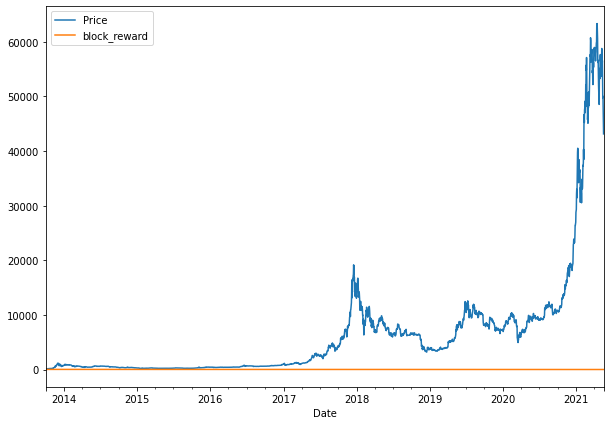

In [99]:
bitcoin_prices_multi.plot(figsize=(10, 7));

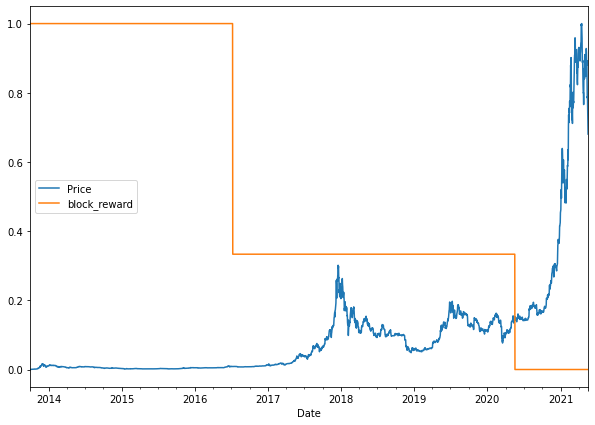

In [100]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_multi[['Price', 'block_reward']]),
                                     columns=bitcoin_prices_multi.columns,
                                     index=bitcoin_prices_multi.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to a window our multivariate data.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [101]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [102]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_multi.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Price{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25.0,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25.0,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25.0,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25.0,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25.0,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25.0,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25.0,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25.0,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [103]:
# Create X (windows) y (horizons) features
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [104]:
len(y) * 0.8

2224.0

In [105]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [106]:
# Make train and test sets using indexing
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229, 8), (551, 8), (2229,), (551,))

## Model 6: Dense model with multivariate data

In [107]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                      layers.Dense(128, activation='relu'),
                      layers.Dense(1)         
], name='Dense_multivariate')

model_6.compile(loss='mae',
                optimizer='adam',
                metrics=['mae'])

model_6.fit(x=X_train,
            y=y_train,
            epochs=100,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[model_checkpoint(model_6.name)]
            )

Epoch 1/100
 1/18 [>.............................] - ETA: 2s - loss: 2739.3792 - mae: 2739.3792INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 17ms/step - loss: 1242.1300 - mae: 1242.1300 - val_loss: 1981.9387 - val_mae: 1981.9387
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 318.2654 - mae: 318.2654 - val_loss: 2020.9270 - val_mae: 2020.9270
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 257.9353 - mae: 257.9353INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 244.9618 - mae: 244.9618 - val_loss: 1213.0558 - val_mae: 1213.0558
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 218.9503 - mae: 218.9503INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 202.7569 - mae: 202.7569 - val_loss: 1115.3252 - val_mae: 1115.3252
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 189.5892 - mae: 189.5892INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 190.2339 - mae: 190.2339 - val_loss: 1090.4824 - val_mae: 1090.4824
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 181.0096 - mae: 181.0096INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 183.1239 - mae: 183.1239 - val_loss: 1039.4836 - val_mae: 1039.4836
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 146.3234 - mae: 146.3234INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 177.3920 - mae: 177.3920 - val_loss: 1012.8217 - val_mae: 1012.8217
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 195.7670 - mae: 195.7670INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 170.6143 - mae: 170.6143 - val_loss: 964.3683 - val_mae: 964.3684
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 164.9315 - mae: 164.9315 - val_loss: 978.7887 - val_mae: 978.7887
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 170.3220 - mae: 170.3220INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 159.1004 - mae: 159.1004 - val_loss: 905.8430 - val_mae: 905.8430
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 164.1186 - mae: 164.1186INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 153.4968 - mae: 153.4968 - val_loss: 887.1129 - val_mae: 887.1129
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 127.6082 - mae: 127.6082INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 151.7009 - mae: 151.7009 - val_loss: 873.3785 - val_mae: 873.3785
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 131.9651 - mae: 131.9651INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 145.3579 - mae: 145.3579 - val_loss: 797.2344 - val_mae: 797.2344
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 168.4949 - mae: 168.4949INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 138.6077 - mae: 138.6077 - val_loss: 776.0808 - val_mae: 776.0808
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 138.9040 - mae: 138.9040INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 136.4019 - mae: 136.4019 - val_loss: 746.8984 - val_mae: 746.8984
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 139.6775 - mae: 139.6775INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 24ms/step - loss: 144.5004 - mae: 144.5004 - val_loss: 738.8931 - val_mae: 738.8931
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 109.9332 - mae: 109.9332INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 135.0725 - mae: 135.0725 - val_loss: 719.1326 - val_mae: 719.1326
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 88.0470 - mae: 88.0470INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 131.6864 - mae: 131.6864 - val_loss: 715.6565 - val_mae: 715.6566
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 121.6037 - mae: 121.6037INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 128.1699 - mae: 128.1699 - val_loss: 694.5974 - val_mae: 694.5974
Epoch 20/100
18/18 [==============================] - 0s 3ms/step - loss: 124.7220 - mae: 124.7220 - val_loss: 715.8673 - val_mae: 715.8673
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 110.4310 - mae: 110.4310INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 123.6677 - mae: 123.6677 - val_loss: 677.0531 - val_mae: 677.0531
Epoch 22/100
18/18 [==============================] - 0s 2ms/step - loss: 122.4241 - mae: 122.4241 - val_loss: 705.9957 - val_mae: 705.9957
Epoch 23/100
18/18 [==============================] - 0s 2ms/step - loss: 130.9416 - mae: 130.9416 - val_loss: 693.1608 - val_mae: 693.1608
Epoch 24/100
18/18 [==============================] - 0s 3ms/step - loss: 122.5625 - mae: 122.5625 - val_loss: 715.9849 - val_mae: 715.9849
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 164.7124 - mae: 164.7124INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 15ms/step - loss: 122.3235 - mae: 122.3235 - val_loss: 662.8117 - val_mae: 662.8117
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 113.9034 - mae: 113.9034INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 119.3856 - mae: 119.3856 - val_loss: 644.1557 - val_mae: 644.1557
Epoch 27/100
18/18 [==============================] - 0s 2ms/step - loss: 117.3224 - mae: 117.3224 - val_loss: 702.6871 - val_mae: 702.6871
Epoch 28/100
18/18 [==============================] - 0s 2ms/step - loss: 121.7764 - mae: 121.7764 - val_loss: 798.1504 - val_mae: 798.1504
Epoch 29/100
18/18 [==============================] - 0s 3ms/step - loss: 120.5996 - mae: 120.5996 - val_loss: 655.4050 - val_mae: 655.4050
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 124.6348 - mae: 124.6348INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 114.4421 - mae: 114.4421 - val_loss: 620.6804 - val_mae: 620.6804
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 114.6551 - mae: 114.6551 - val_loss: 647.9469 - val_mae: 647.9469
Epoch 32/100
18/18 [==============================] - 0s 2ms/step - loss: 115.7224 - mae: 115.7224 - val_loss: 676.8950 - val_mae: 676.8950
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 119.3124 - mae: 119.3124 - val_loss: 656.7574 - val_mae: 656.7574
Epoch 34/100
18/18 [==============================] - 0s 2ms/step - loss: 129.1688 - mae: 129.1688 - val_loss: 705.7496 - val_mae: 705.7496
Epoch 35/100
18/18 [==============================] - 0s 2ms/step - loss: 122.1947 - mae: 122.1947 - val_loss: 749.2542 - val_mae: 749.2542
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 129.9510 - mae: 129.9510INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\as

INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 15ms/step - loss: 114.8558 - mae: 114.8558 - val_loss: 602.9644 - val_mae: 602.9644
Epoch 37/100
18/18 [==============================] - 0s 3ms/step - loss: 114.0578 - mae: 114.0578 - val_loss: 617.4780 - val_mae: 617.4780
Epoch 38/100
18/18 [==============================] - 0s 3ms/step - loss: 110.7658 - mae: 110.7658 - val_loss: 608.4230 - val_mae: 608.4230
Epoch 39/100
18/18 [==============================] - 0s 2ms/step - loss: 113.3181 - mae: 113.3181 - val_loss: 619.5828 - val_mae: 619.5828
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 126.2239 - mae: 126.2239INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 111.4895 - mae: 111.4895 - val_loss: 597.5742 - val_mae: 597.5742
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 111.0920 - mae: 111.0920 - val_loss: 624.7091 - val_mae: 624.7091
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 111.5435 - mae: 111.5435 - val_loss: 599.7265 - val_mae: 599.7265
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 115.1480 - mae: 115.1480 - val_loss: 681.0312 - val_mae: 681.0312
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 96.4105 - mae: 96.4105INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 15ms/step - loss: 112.1942 - mae: 112.1942 - val_loss: 592.9431 - val_mae: 592.9431
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 109.8586 - mae: 109.8586 - val_loss: 593.2504 - val_mae: 593.2504
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 79.2793 - mae: 79.2793INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 110.2286 - mae: 110.2286 - val_loss: 587.7304 - val_mae: 587.7304
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 109.1653 - mae: 109.1653 - val_loss: 611.6860 - val_mae: 611.6860
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 108.4315 - mae: 108.4315 - val_loss: 604.5797 - val_mae: 604.5797
Epoch 49/100
18/18 [==============================] - 0s 3ms/step - loss: 108.9148 - mae: 108.9148 - val_loss: 648.8611 - val_mae: 648.8611
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 112.2623 - mae: 112.2623 - val_loss: 601.1374 - val_mae: 601.1374
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 108.3899 - mae: 108.3899 - val_loss: 587.7482 - val_mae: 587.7482
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 111.0886 - mae: 111.0886 - val_loss: 621.7108 - val_mae: 621.7108
Epoch 53/100
18/18 [============

INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 15ms/step - loss: 108.3626 - mae: 108.3626 - val_loss: 582.4516 - val_mae: 582.4516
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 107.7489 - mae: 107.7489 - val_loss: 586.1252 - val_mae: 586.1252
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 109.4316 - mae: 109.4316 - val_loss: 629.1414 - val_mae: 629.1414
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 118.2666 - mae: 118.2666 - val_loss: 624.6042 - val_mae: 624.6042
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 123.1237 - mae: 123.1237 - val_loss: 584.1430 - val_mae: 584.1430
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 115.7729 - mae: 115.7729 - val_loss: 673.8995 - val_mae: 673.8995
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 122.0154 - mae: 122.0154 - val_loss: 698.2070 - val_mae: 698.2070
Epoch 64/100
18/18 [============

INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 107.3665 - mae: 107.3665 - val_loss: 581.4796 - val_mae: 581.4796
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 106.7707 - mae: 106.7707 - val_loss: 601.4655 - val_mae: 601.4655
Epoch 69/100
 1/18 [>.............................] - ETA: 0s - loss: 95.3353 - mae: 95.3353INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 107.3996 - mae: 107.3996 - val_loss: 580.4529 - val_mae: 580.4529
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 113.9274 - mae: 113.9274INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 108.4314 - mae: 108.4314 - val_loss: 578.4641 - val_mae: 578.4641
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 93.1722 - mae: 93.1722INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 105.8889 - mae: 105.8889 - val_loss: 578.0678 - val_mae: 578.0678
Epoch 72/100
18/18 [==============================] - 0s 3ms/step - loss: 106.9293 - mae: 106.9293 - val_loss: 580.1719 - val_mae: 580.1719
Epoch 73/100
18/18 [==============================] - 0s 2ms/step - loss: 109.0335 - mae: 109.0335 - val_loss: 598.6926 - val_mae: 598.6926
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 110.9704 - mae: 110.9704INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 107.1590 - mae: 107.1590 - val_loss: 577.6563 - val_mae: 577.6563
Epoch 75/100
18/18 [==============================] - 0s 2ms/step - loss: 110.2417 - mae: 110.2417 - val_loss: 717.1862 - val_mae: 717.1862
Epoch 76/100
18/18 [==============================] - 0s 2ms/step - loss: 110.6068 - mae: 110.6068 - val_loss: 582.1846 - val_mae: 582.1846
Epoch 77/100
18/18 [==============================] - 0s 2ms/step - loss: 106.7708 - mae: 106.7708 - val_loss: 579.4441 - val_mae: 579.4441
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 103.9496 - mae: 103.9496INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 105.0783 - mae: 105.0783 - val_loss: 577.5490 - val_mae: 577.5490
Epoch 79/100
18/18 [==============================] - 0s 2ms/step - loss: 109.8773 - mae: 109.8773 - val_loss: 611.4376 - val_mae: 611.4376
Epoch 80/100
18/18 [==============================] - 0s 2ms/step - loss: 107.3098 - mae: 107.3098 - val_loss: 593.3993 - val_mae: 593.3993
Epoch 81/100
18/18 [==============================] - 0s 2ms/step - loss: 110.5601 - mae: 110.5601 - val_loss: 742.2009 - val_mae: 742.2009
Epoch 82/100
18/18 [==============================] - 0s 2ms/step - loss: 113.4062 - mae: 113.4062 - val_loss: 583.9106 - val_mae: 583.9106
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 107.2394 - mae: 107.2394 - val_loss: 691.0717 - val_mae: 691.0717
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 113.9305 - mae: 113.9305 - val_loss: 590.6546 - val_mae: 590.6546
Epoch 85/100
18/18 [============

INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 106.6253 - mae: 106.6253 - val_loss: 577.2978 - val_mae: 577.2978
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 87.9976 - mae: 87.9976INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 105.5851 - mae: 105.5851 - val_loss: 576.1941 - val_mae: 576.1941
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 106.0327 - mae: 106.0327 - val_loss: 659.7817 - val_mae: 659.7817
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 105.6612 - mae: 105.6612 - val_loss: 587.1814 - val_mae: 587.1814
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 108.2896 - mae: 108.2896 - val_loss: 576.5386 - val_mae: 576.5386
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 105.3088 - mae: 105.3088 - val_loss: 635.0467 - val_mae: 635.0467
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 106.3712 - mae: 106.3712 - val_loss: 577.5480 - val_mae: 577.5480
Epoch 93/100
18/18 [==============================] - 0s 2ms/step - loss: 104.5447 - mae: 104.5447 - val_loss: 611.9700 - val_mae: 611.9700
Epoch 94/100
18/18 [============

INFO:tensorflow:Assets written to: modelling_experiments\Dense_multivariate\assets


18/18 [==============================] - 0s 14ms/step - loss: 111.5438 - mae: 111.5438 - val_loss: 574.5292 - val_mae: 574.5292


In [108]:
model_6_load = tf.keras.models.load_model('modelling_experiments\Dense_multivariate')
model_6_load.evaluate(X_test, y_test)

18/18 [==============================] - 0s 941us/step - loss: 574.4543 - mae: 574.4543


[574.4542846679688, 574.4542846679688]

In [109]:
# Make predictions with multivariate model
model_6_preds = model_6.predict(X_test)
model_6_preds[:10]

array([[8778.644 ],
       [8663.773 ],
       [8498.97  ],
       [8472.668 ],
       [8526.873 ],
       [8233.084 ],
       [8099.3237],
       [8075.5103],
       [7635.2495],
       [7291.899 ]], dtype=float32)

In [110]:
y_test.shape, model_6_preds.shape

((551,), (551, 1))

In [111]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=tf.squeeze(model_6_preds))
model_6_results

{'MAE': 574.4543,
 'MSE': 1175224.4,
 'RMSE': 1084.0776,
 'MAPE': 2.565581,
 'MASE': 1.0026237}

In [112]:
model_1_result

{'MAE': 568.6202,
 'MSE': 1173581.1,
 'RMSE': 1083.3195,
 'MAPE': 2.544373,
 'MASE': 0.99890816}

## Model 7: N-BEATS algorithm

Let's now try to build the biggest baddes (though maybe not the baddes , as in, it performs really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the model in the N_BEATS paper.


* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the functional API to create custom achitecture

### Building and testing the N-BEATS block layer

In [113]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers


In [114]:
# Create NBeatsBlock custom layer

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation 
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]

    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')



  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast
    

In [115]:
# Set up dummy inputs and outputs to test
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [116]:
# Create dummy inputs
dummy_input = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndims=2)
dummy_input

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [117]:
# Pass input to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_input)
# THese are the activation outputs of the theta layer
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.1900411   0.8375253  -0.32817933  0.251763   -0.47530687 -0.7783142
 -0.5298027 ]
Forecast: -0.7554261684417725


### Preparing data for the N-BEATS using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide

In [118]:
WINDOW_SIZE = 7
HORIZON = 1

In [119]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [120]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [121]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']


In [122]:
# Make train and test set
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(X_test)

(2224, 556)

In [123]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

In [124]:
# Combine the dataset to a tuple
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

In [125]:
# Pretetch and batching
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up hyperparameters for N-BEATS algorithm


In [126]:
# Values from N-BEATS paper (table 18)
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON
INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for the residual connection

In [127]:
# Make tensors to test residual
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

In [128]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>)

In [129]:
# Subtracted
subtracted = layers.subtract([tensor_1, tensor_2])
added = layers.add([tensor_1, tensor_2])

subtracted, added

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])>)

### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of NBEATS block layer
2. Create an input layer for the NBEATS stack (we'll be using the keras functional API)
3. Make the initial backcast and forecast for the model with the layer created in (1)
4. Use for loop to create stacks of block layers.
5. Use the NBeatsBlock class within the for loop in (4) to create blocks which returnb backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs togheter using keras model
8. Compile the model with MAE loss (the paper uses multiple losses but this will suffice) and adam opimizers with defaults settings.
9. Fit the N-BEATS model for 5000 epochs and since its fitting for so many epochs use callbacks 
  * Early stopping
  * Reduce LR on Plateau
 

In [130]:
tf.random.set_seed(42)
nblock = NBeatsBlock(input_size=INPUT_SIZE,
                     theta_size=THETA_SIZE,
                     horizon=HORIZON,
                     n_neurons=N_NEURONS,
                     n_layers=N_LAYERS,
                     name='Initial_block')
stack_input = layers.Input(shape=(INPUT_SIZE))

backcast, forecast = nblock(stack_input)
residuals = layers.subtract([backcast, stack_input], name='subtract00')
for i, _ in enumerate(range(N_STACKS-1)):
  
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f'NBeatsBlock{i}'
  )(residuals)
  residuals = layers.subtract([backcast, residuals], name=f'subtract{i}')
  forecast = layers.add([block_forecast, forecast])



model_7 = tf.keras.Model(stack_input, forecast)


In [131]:
model_7.compile(loss='mae',
                optimizer='adam',
                metrics=['mae'])

model_7.fit(train_dataset,
            validation_data=test_dataset,
            epochs=N_EPOCHS,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=100, verbose=1)]
            )


Epoch 00203: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00303: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [132]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 26ms/step - loss: 581.0284 - mae: 581.0284


[581.0283813476562, 581.0283813476562]

In [133]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8898.93 , 8798.336, 8958.437, 8802.566, 8782.227, 8706.562,
       8625.803, 8566.41 , 8452.818, 8481.34 ], dtype=float32)>

In [134]:
y_test[:10]

Date
2019-11-10    8798.042055
2019-11-11    9081.186878
2019-11-12    8711.534339
2019-11-13    8760.892718
2019-11-14    8749.520591
2019-11-15    8656.970922
2019-11-16    8500.643558
2019-11-17    8469.260899
2019-11-18    8537.339652
2019-11-19    8205.806366
Name: Price, dtype: float64

In [135]:
# Evaluate N-BEATS model preds

model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=tf.cast(model_7_preds, dtype=tf.float64))
model_7_results

{'MAE': 581.0284,
 'MSE': 1199169.1,
 'RMSE': 1095.0658,
 'MAPE': 2.6477766,
 'MASE': 1.0207059}

## Model 8: Ensemble (multiple models stacked together)

### Constructing and fitting an ensemble of models (using different loss functions)

In [136]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fn=['mae', 'mse', 'mape']):
  """
  Returns a list of num,_iter models each trained on MAE, MSE, MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  """
  # Make empty list for trained ensemble
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fn:
      print(f'Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}')

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
                                   layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
                                   layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
                                   layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer='adam',
                    metrics=['mae', 'mse'])
      
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [137]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 00863: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00974: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00592: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00144: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00255: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00355: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 00748: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 00333: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 0

### Make predictions with our ensemble model

In [138]:
# Create a function that uses a list of models instead

def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [139]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

CPU times: total: 594 ms
Wall time: 448 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8793.306,  8777.484,  9038.28 , ..., 50200.848, 49205.973,
        46477.117],
       [ 8721.555,  8719.248,  9050.4  , ..., 49367.223, 48479.082,
        45326.54 ],
       [ 8750.416,  8731.694,  9100.177, ..., 49838.07 , 47800.566,
        45228.625],
       ...,
       [ 8830.127,  8758.588,  9093.166, ..., 49552.832, 49529.805,
        46421.527],
       [ 8722.24 ,  8809.816,  9102.045, ..., 49587.375, 48466.78 ,
        45028.05 ],
       [ 8794.666,  8785.407,  9040.532, ..., 49804.914, 48006.324,
        45707.906]], dtype=float32)>

In [140]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0))
ensemble_results

{'MAE': 564.3529,
 'MSE': 1134710.9,
 'RMSE': 1065.228,
 'MAPE': 2.575143,
 'MASE': 0.99141175}

In [141]:
ensemble_results_mean = evaluate_preds(y_true=y_test,
                                       y_pred=tf.reduce_mean(ensemble_preds, axis=0))
ensemble_results_mean

{'MAE': 566.47034,
 'MSE': 1137807.4,
 'RMSE': 1066.6805,
 'MAPE': 2.577448,
 'MASE': 0.9951315}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

In [142]:
# Find upper and lower bounds of ensemble predictions
np.max(ensemble_preds), np.min(ensemble_preds), np.std(ensemble_preds)

(64000.504, 4207.1816, 17539.607)

In [143]:
ensemble_range = 1.96 * np.std(ensemble_preds)
ensemble_range

34377.630546875

In [144]:
upper_bound = np.max(ensemble_preds) - ensemble_range
lower_bound = np.min(ensemble_preds) + ensemble_range
upper_bound, lower_bound

(29622.873359375, 38584.8121875)

In [145]:
def get_upper_lower_preds(preds):
  
  std = tf.math.reduce_std(preds, axis=0)

  interval = 1.96 * std

  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean + interval, preds_mean - interval

  return lower, upper

In [146]:
# Get the lower and upper bound of the 95% precent prediction interval
lower, upper = get_upper_lower_preds(ensemble_preds)

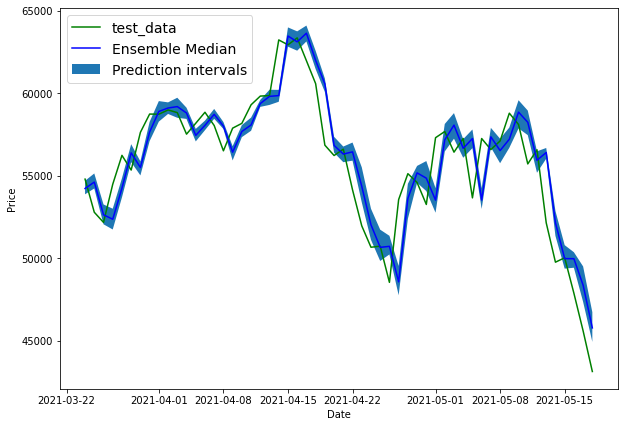

In [147]:
# Get the median/mean
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the predictions intervals 
offset = 500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], 'g', label='test_data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'b', label='Ensemble Median')
plt.xlabel('Date')
plt.ylabel('Price')
# Use fill_between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label='Prediction intervals')
plt.legend(loc='upper left', fontsize=14)

So far all of our models predictions have been lagging behind the data...

As if they're replicating what the naive model does and just predict the prvious timestep as the next timestep

**Note:** These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: two types uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the question:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it be helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning you should know about:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as data uncertainty or subway uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty

## Model 9:  Train a model on the full historical data to make predictions into the future

So far we have only used pseudo future.

Let's build a model which can predict into the future

In [148]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25.0,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25.0,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25.0,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25.0,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [149]:
# Train a model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [150]:
# Turn data into efficient running densors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)

labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

dataset_all = dataset_all.batch(1024).prefetch(tf.data.AUTOTUNE)
dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

### Build model 9 the same way. Simple dense etc

In [151]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(128, activation='relu'),
                               layers.Dense(1)
], name='model_9')

model_9.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

model_9.fit(dataset_all,
            batch_size=BATCH_SIZE,
            verbose=1,
            epochs=100,
            )

Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 4310.7344 - mae: 4310.7344 - mse: 64877984.0000
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 2285.9414 - mae: 2285.9414 - mse: 17855328.0000
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 455.6305 - mae: 455.6305 - mse: 918024.9375
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 1401.2065 - mae: 1401.2065 - mse: 9270786.0000
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 1371.3412 - mae: 1371.3412 - mse: 7767368.5000
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 612.5281 - mae: 612.5281 - mse: 1748016.7500
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 575.7347 - mae: 575.7347 - mse: 1922233.2500
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 811.0078 - mae: 811.0078 - mse: 3096853.7500
Epoch 9/100
3/3 [==============================] - 0s 3ms/step 

### Make predictions into the future

It will only be a day since our horizon is 1

In [152]:
model_9_preds = make_preds(model_9, tf.expand_dims(y_all[-WINDOW_SIZE:], axis=0))
model_9_preds

<tf.Tensor: shape=(), dtype=float32, numpy=55321.375>

In [154]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make a prediction into the future we want a function which:

1. Takes input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as model_9)
  * a window into the future to predict (our `INTO_FUTURE`)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on 
2. Creates an empty list of future forecast this will be returned at the end of the end, when it's full of predictions and extracts the last `WINDOW_SIZE` values from input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the lates prediction 

In [155]:
def future_forecast(values, model, into_future=INTO_FUTURE, window_size=WINDOW_SIZE) -> list:

  forecast_list = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):

    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f'Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n')

    forecast_list.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)
    last_window = last_window[1:]

  return forecast_list



In [156]:
forecasting = future_forecast(y_all, model_9)
forecasting

Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55321.375

Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55321.375     ] -> Prediction: 50633.62890625

Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55321.375      50633.62890625] -> Prediction: 48451.390625

Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55321.375      50633.62890625 48451.390625  ] -> Prediction: 47930.78125

Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55321.375
 50633.62890625 48451.390625   47930.78125   ] -> Prediction: 47414.52734375

Predicting on: 
 [45604.61575361 43144.47129086 55321.375      50633.62890625
 48451.390625   47930.78125    47414.52734375] -> Prediction: 46439.79296875

Predicting on: 
 [43144.47129086 55321.375      50633.62890625 48451.390625
 47

[55321.375,
 50633.63,
 48451.39,
 47930.78,
 47414.527,
 46439.793,
 47883.44,
 53196.582,
 49063.375,
 47193.027,
 47538.527,
 47919.24,
 47832.59,
 49451.652]

### Plot future forecasts

In [157]:
def get_future_date(start_date, into_future, offset=1):

  start_date = start_date #+ np.timedelta64(offset, 'D') # SPecify start date "D" stands for day
  end_date = start_date + np.timedelta64(into_future, 'D')

  return np.arange(start_date, end_date, dtype='datetime64[D]')

In [158]:
last_timestep = bitcoin_prices.index[-1]
future_date = get_future_date(last_timestep, into_future=INTO_FUTURE)

In [159]:
# instert last timestep/final price into next time steps and future forecast so the plot is joint
future_date = np.insert(future_date, 0, last_timestep)
forecasting = np.insert(forecasting, 0, btc_price[-1])

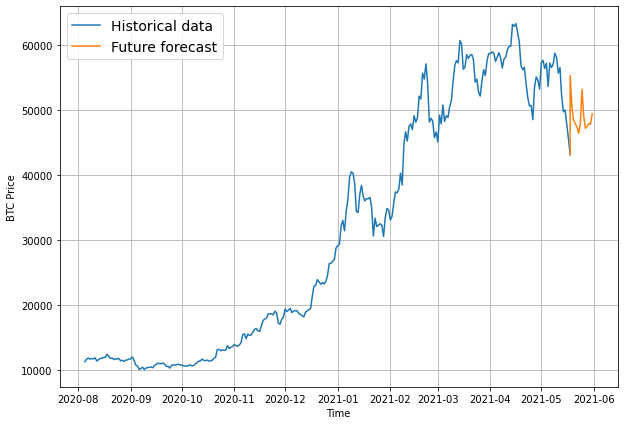

In [160]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=bitcoin_prices.index, values=btc_price, format='-', start=2500, label='Historical data')
plot_time_series(timesteps=future_date, values=forecasting, format='-', label='Future forecast')

## Model 10: Turkey model (Turkey data introduced) Why forecasting is BS

In [173]:
# Let's introduce a turkey problem in our BTC data price falls 100x in one day
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [174]:
# Manufacture an extra price on the end
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [175]:
# Get the time steps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

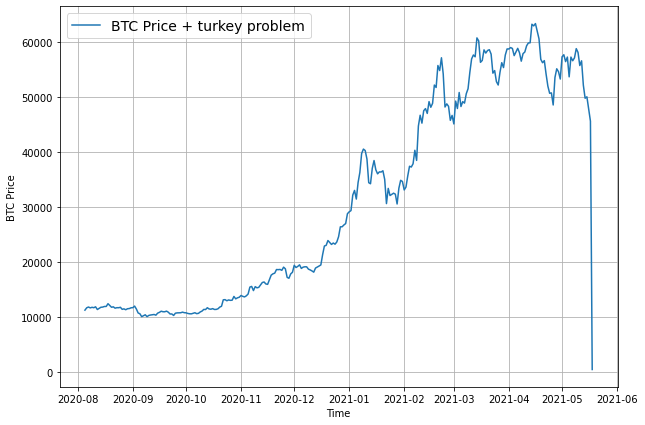

In [177]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                values=btc_price_turkey,
                 format='-',
                 label='BTC Price + turkey problem',
                 start=2500)

In [178]:
# Create train and test sets for turkey problem
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_split(full_windows, full_labels)
X_train.shape, X_test.shape

((2224, 7), (556, 7))

### Build a turkey model

In [182]:
model_10 = tf.keras.models.clone_model(model_1)

model_10._name = 'model_10_turkey_model'

model_10.compile(loss='mae',
                 optimizer='adam',
                 metrics=['mae', 'mse'])

model_10.fit(x=X_train,
             y=y_train,
             validation_data=(X_test, y_test),
             epochs=100,
             verbose=1,
             batch_size=128,
             callbacks=[model_checkpoint(model_10.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1213.7180 - mae: 1213.7180 - mse: 5215917.0000 INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 20ms/step - loss: 1194.7323 - mae: 1194.7323 - mse: 5110351.5000 - val_loss: 2512.4622 - val_mae: 2512.4622 - val_mse: 19497954.0000
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 316.7911 - mae: 316.7911 - mse: 409937.8438INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 313.7241 - mae: 313.7241 - mse: 402733.9688 - val_loss: 1453.9788 - val_mae: 1453.9788 - val_mse: 8902776.0000
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 187.9269 - mae: 187.9269 - mse: 175305.3594INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 17ms/step - loss: 185.7010 - mae: 185.7010 - mse: 175939.9219 - val_loss: 1204.1445 - val_mae: 1204.1445 - val_mse: 7844741.5000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 225.5787 - mae: 225.5787 - mse: 210417.9062INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 172.9284 - mae: 172.9284 - mse: 158994.5156 - val_loss: 1037.1981 - val_mae: 1037.1981 - val_mse: 7387780.5000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 168.9790 - mae: 168.9790 - mse: 109735.9609INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 166.8686 - mae: 166.8686 - mse: 150872.7031 - val_loss: 997.3185 - val_mae: 997.3185 - val_mse: 7112732.5000
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 159.6832 - mae: 159.6832 - mse: 131292.4531INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 17ms/step - loss: 161.3243 - mae: 161.3243 - mse: 140123.1562 - val_loss: 974.8595 - val_mae: 974.8595 - val_mse: 7126761.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 195.8413 - mae: 195.8413 - mse: 264120.4062INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 154.7563 - mae: 154.7563 - mse: 129415.3359 - val_loss: 960.7039 - val_mae: 960.7039 - val_mse: 6610401.5000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 125.8083 - mae: 125.8083 - mse: 65726.4062INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 145.9191 - mae: 145.9191 - mse: 118070.9922 - val_loss: 889.9215 - val_mae: 889.9215 - val_mse: 6525787.5000
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 128.4676 - mae: 128.4676 - mse: 74226.2344INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 144.7875 - mae: 144.7875 - mse: 115594.2500 - val_loss: 880.3834 - val_mae: 880.3834 - val_mse: 6210332.5000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 151.9431 - mae: 151.9431 - mse: 155239.4375INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 139.7857 - mae: 139.7857 - mse: 109458.4453 - val_loss: 860.1273 - val_mae: 860.1273 - val_mse: 6067638.0000
Epoch 11/100
14/18 [======================>.......] - ETA: 0s - loss: 137.4432 - mae: 137.4432 - mse: 104785.5078INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 17ms/step - loss: 135.7245 - mae: 135.7245 - mse: 101490.9688 - val_loss: 825.9501 - val_mae: 825.9501 - val_mse: 5938528.0000
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 132.3879 - mae: 132.3879 - mse: 98492.7500 - val_loss: 855.6786 - val_mae: 855.6786 - val_mse: 5853076.5000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 108.5249 - mae: 108.5249 - mse: 72734.5547INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 130.3651 - mae: 130.3651 - mse: 96272.4609 - val_loss: 818.7522 - val_mae: 818.7522 - val_mse: 5732972.5000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 128.2262 - mae: 128.2262 - mse: 70855.6172INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 15ms/step - loss: 126.3093 - mae: 126.3093 - mse: 91601.8359 - val_loss: 799.3278 - val_mae: 799.3278 - val_mse: 5630671.0000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 118.5746 - mae: 118.5746 - mse: 54554.3477INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 15ms/step - loss: 127.1513 - mae: 127.1513 - mse: 90700.4609 - val_loss: 786.4181 - val_mae: 786.4181 - val_mse: 5543213.5000
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 126.0185 - mae: 126.0185 - mse: 88028.5469 - val_loss: 840.9878 - val_mae: 840.9878 - val_mse: 5560748.0000
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 116.6283 - mae: 116.6283 - mse: 54148.8047INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 15ms/step - loss: 123.3723 - mae: 123.3723 - mse: 84371.2656 - val_loss: 783.6822 - val_mae: 783.6822 - val_mse: 5410173.0000
Epoch 18/100
18/18 [==============================] - 0s 3ms/step - loss: 120.9743 - mae: 120.9743 - mse: 85184.2266 - val_loss: 793.2421 - val_mae: 793.2421 - val_mse: 5373110.5000
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 120.5787 - mae: 120.5787 - mse: 82369.8672 - val_loss: 861.6407 - val_mae: 861.6407 - val_mse: 5473085.5000
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 134.7019 - mae: 134.7019 - mse: 86335.2656INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 15ms/step - loss: 119.8430 - mae: 119.8430 - mse: 80963.7812 - val_loss: 721.5133 - val_mae: 721.5132 - val_mse: 5230012.0000
Epoch 21/100
18/18 [==============================] - 0s 3ms/step - loss: 121.2235 - mae: 121.2235 - mse: 83817.8672 - val_loss: 726.9775 - val_mae: 726.9775 - val_mse: 5185207.0000
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 166.8074 - mae: 166.8074 - mse: 152918.7031INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 15ms/step - loss: 115.7024 - mae: 115.7024 - mse: 79065.8594 - val_loss: 717.1793 - val_mae: 717.1793 - val_mse: 5146836.5000
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 115.8088 - mae: 115.8088 - mse: 60246.4922INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 116.5042 - mae: 116.5042 - mse: 78661.5859 - val_loss: 698.4793 - val_mae: 698.4793 - val_mse: 5124349.0000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 119.3692 - mae: 119.3692 - mse: 73235.8125INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 15ms/step - loss: 113.8317 - mae: 113.8317 - mse: 77482.0469 - val_loss: 690.5090 - val_mae: 690.5090 - val_mse: 5119160.0000
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 114.4547 - mae: 114.4547 - mse: 75853.1328 - val_loss: 701.1703 - val_mae: 701.1703 - val_mse: 5198246.5000
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 111.7486 - mae: 111.7486 - mse: 61133.5312INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 114.6422 - mae: 114.6422 - mse: 75943.4922 - val_loss: 683.2125 - val_mae: 683.2125 - val_mse: 5087188.5000
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 155.2556 - mae: 155.2556 - mse: 119979.1016INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 17ms/step - loss: 113.8181 - mae: 113.8181 - mse: 75367.4922 - val_loss: 677.0537 - val_mae: 677.0537 - val_mse: 5042040.0000
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 101.0974 - mae: 101.0974 - mse: 62162.0938INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 110.3202 - mae: 110.3202 - mse: 73912.0312 - val_loss: 673.6237 - val_mae: 673.6237 - val_mse: 5020368.0000
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4419 - mae: 111.4419 - mse: 74864.9766 - val_loss: 674.9301 - val_mae: 674.9302 - val_mse: 4961387.0000
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 114.3299 - mae: 114.3299 - mse: 75670.3438 - val_loss: 684.6611 - val_mae: 684.6611 - val_mse: 4946732.5000
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 116.6910 - mae: 116.6910 - mse: 74974.6875 - val_loss: 781.1566 - val_mae: 781.1566 - val_mse: 5061398.0000
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 127.6996 - mae: 127.6996 - mse: 83060.4375INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 115.1813 - mae: 115.1813 - mse: 78257.3594 - val_loss: 664.5540 - val_mae: 664.5540 - val_mse: 4954206.5000
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 111.6415 - mae: 111.6415 - mse: 73678.1875 - val_loss: 670.2835 - val_mae: 670.2835 - val_mse: 4918622.5000
Epoch 34/100
18/18 [==============================] - 0s 3ms/step - loss: 112.1315 - mae: 112.1315 - mse: 75592.2500 - val_loss: 682.4004 - val_mae: 682.4004 - val_mse: 4909790.0000
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 97.1907 - mae: 97.1907 - mse: 45863.0586INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 110.8101 - mae: 110.8101 - mse: 73889.3750 - val_loss: 660.2703 - val_mae: 660.2703 - val_mse: 4944439.0000
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 116.6037 - mae: 116.6037 - mse: 74870.4062 - val_loss: 716.5154 - val_mae: 716.5154 - val_mse: 4928968.5000
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0492 - mae: 112.0492 - mse: 74194.4297 - val_loss: 689.2645 - val_mae: 689.2645 - val_mse: 5067369.0000
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 108.0650 - mae: 108.0650 - mse: 71709.9453INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 109.8567 - mae: 109.8567 - mse: 73448.2500 - val_loss: 656.9418 - val_mae: 656.9418 - val_mse: 4913165.0000
Epoch 39/100
18/18 [==============================] - 0s 3ms/step - loss: 109.2938 - mae: 109.2938 - mse: 72507.9219 - val_loss: 662.9762 - val_mae: 662.9762 - val_mse: 4976774.5000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 100.2914 - mae: 100.2914 - mse: 88084.8125INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 15ms/step - loss: 108.7834 - mae: 108.7834 - mse: 72378.2422 - val_loss: 655.2379 - val_mae: 655.2379 - val_mse: 4918768.0000
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 110.0251 - mae: 110.0251 - mse: 71788.3438 - val_loss: 710.7039 - val_mae: 710.7039 - val_mse: 5155806.0000
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 106.6406 - mae: 106.6406 - mse: 56353.3516INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 15ms/step - loss: 114.9021 - mae: 114.9021 - mse: 75257.0234 - val_loss: 653.2820 - val_mae: 653.2820 - val_mse: 4934988.5000
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 108.7060 - mae: 108.7060 - mse: 70583.2266 - val_loss: 675.5263 - val_mae: 675.5263 - val_mse: 5053427.0000
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1831 - mae: 109.1831 - mse: 70724.7734 - val_loss: 657.4259 - val_mae: 657.4259 - val_mse: 4944722.0000
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 108.0546 - mae: 108.0546 - mse: 71606.5234 - val_loss: 660.0145 - val_mae: 660.0145 - val_mse: 4949777.5000
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 109.6322 - mae: 109.6322 - mse: 71261.2422 - val_loss: 657.2466 - val_mae: 657.2466 - val_mse: 4999043.5000
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7048 - mae: 108.7048 - m

INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 109.0072 - mae: 109.0072 - mse: 70661.9141 - val_loss: 652.2036 - val_mae: 652.2036 - val_mse: 4964505.0000
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 108.6855 - mae: 108.6855 - mse: 70446.5625 - val_loss: 702.5652 - val_mae: 702.5652 - val_mse: 5163928.0000
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 109.1767 - mae: 109.1767 - mse: 70339.8984 - val_loss: 683.8377 - val_mae: 683.8377 - val_mse: 4924680.5000
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 110.5124 - mae: 110.5124 - mse: 72904.6094 - val_loss: 689.3391 - val_mae: 689.3391 - val_mse: 5113090.0000
Epoch 53/100
18/18 [==============================] - 0s 3ms/step - loss: 110.7994 - mae: 110.7994 - mse: 72082.4922 - val_loss: 673.3403 - val_mae: 673.3403 - val_mse: 4905943.0000
Epoch 54/100
18/18 [==============================] - 0s 3ms/step - loss: 113.7556 - mae: 113.7556 - m

INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 15ms/step - loss: 108.9737 - mae: 108.9737 - mse: 71255.0312 - val_loss: 650.6259 - val_mae: 650.6259 - val_mse: 4938240.5000
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 105.4047 - mae: 105.4047 - mse: 68163.3594 - val_loss: 652.1871 - val_mae: 652.1871 - val_mse: 4986216.0000
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 109.0534 - mae: 109.0534 - mse: 70499.1094 - val_loss: 716.9797 - val_mae: 716.9797 - val_mse: 4952891.0000
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 110.7031 - mae: 110.7031 - mse: 70945.8438 - val_loss: 745.4246 - val_mae: 745.4246 - val_mse: 5000067.5000
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 143.0424 - mae: 143.0424 - mse: 167857.7188INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 110.7542 - mae: 110.7542 - mse: 71730.3750 - val_loss: 646.0976 - val_mae: 646.0976 - val_mse: 4921514.0000
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 110.4418 - mae: 110.4418 - mse: 69929.8984 - val_loss: 656.7689 - val_mae: 656.7689 - val_mse: 4990004.5000
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 106.0941 - mae: 106.0941 - mse: 67572.8984 - val_loss: 684.7809 - val_mae: 684.7809 - val_mse: 5099971.0000
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 112.1761 - mae: 112.1761 - mse: 68754.0781 - val_loss: 756.8365 - val_mae: 756.8365 - val_mse: 5360759.0000
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 119.5956 - mae: 119.5956 - mse: 76754.5938 - val_loss: 680.7574 - val_mae: 680.7574 - val_mse: 5097056.0000
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 121.5774 - mae: 121.5774 - m

INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 15ms/step - loss: 108.4217 - mae: 108.4217 - mse: 70214.4062 - val_loss: 645.6226 - val_mae: 645.6226 - val_mse: 4933121.5000
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 104.6978 - mae: 104.6978 - mse: 68080.7734 - val_loss: 645.7128 - val_mae: 645.7128 - val_mse: 4943827.5000
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 185.7159 - mae: 185.7159 - mse: 217184.4844INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 112.2886 - mae: 112.2886 - mse: 72970.2344 - val_loss: 644.8854 - val_mae: 644.8854 - val_mse: 4905921.0000
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 109.2413 - mae: 109.2413 - mse: 69957.5547 - val_loss: 740.3754 - val_mae: 740.3754 - val_mse: 5281722.5000
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 109.6810 - mae: 109.6810 - mse: 70631.9766 - val_loss: 645.1979 - val_mae: 645.1979 - val_mse: 4934514.0000
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 106.7542 - mae: 106.7542 - mse: 69010.4922 - val_loss: 646.4597 - val_mae: 646.4597 - val_mse: 4910977.0000
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 105.4671 - mae: 105.4671 - mse: 67184.4375 - val_loss: 654.3327 - val_mae: 654.3327 - val_mse: 4899817.0000
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 105.7895 - mae: 105.7895 - m

INFO:tensorflow:Assets written to: modelling_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 16ms/step - loss: 105.2455 - mae: 105.2455 - mse: 67341.4062 - val_loss: 644.1939 - val_mae: 644.1939 - val_mse: 4912278.5000
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 105.8610 - mae: 105.8610 - mse: 65798.2344 - val_loss: 689.6871 - val_mae: 689.6871 - val_mse: 4906307.5000
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 111.9329 - mae: 111.9329 - mse: 70912.3047 - val_loss: 706.1548 - val_mae: 706.1547 - val_mse: 5182445.0000
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 107.1204 - mae: 107.1204 - mse: 69379.1641 - val_loss: 664.0000 - val_mae: 664.0000 - val_mse: 5048585.5000
Epoch 93/100
18/18 [==============================] - 0s 3ms/step - loss: 110.7636 - mae: 110.7636 - mse: 69720.2500 - val_loss: 684.9677 - val_mae: 684.9677 - val_mse: 5107279.5000
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 110.8304 - mae: 110.8304 - m

In [183]:
# Evaluate
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 683.0884 - mae: 683.0884 - mse: 4916950.5000


[683.0884399414062, 683.0884399414062, 4916950.5]

In [184]:
model_10_load = tf.keras.models.load_model('modelling_experiments\model_10_turkey_model')
model_10_load.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 644.1939 - mae: 644.1939 - mse: 4912278.5000


[644.1939086914062, 644.1939086914062, 4912278.5]

In [185]:
turkey_preds = make_preds(model_10_load, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8830.18 , 8758.198, 9004.29 , 8784.193, 8714.892, 8703.449,
       8665.655, 8498.767, 8438.563, 8497.609], dtype=float32)>

In [187]:
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'MAE': 17127.193,
 'MSE': 614246400.0,
 'RMSE': 23708.33,
 'MAPE': 121.308914,
 'MASE': 26.504387}

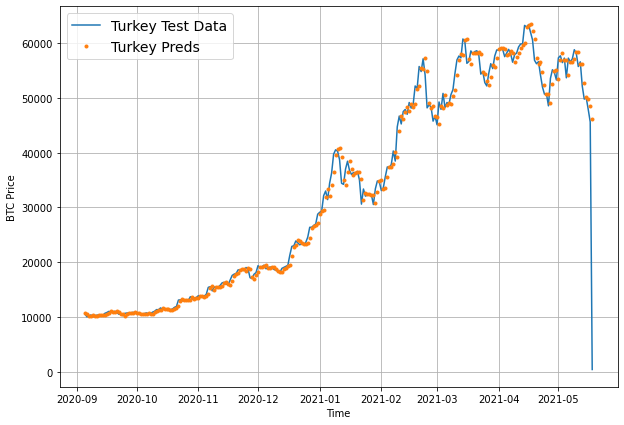

In [188]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format='-',
                 label='Turkey Test Data',
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label='Turkey Preds',
                 start=offset)

A model can not predict on anything outside the distribution it was trained on

## Comparing the results of the models

In [191]:
# Compare different model results (w = window, h = horizon)

model_results = pd.DataFrame({'naive_model': naive_result,
                              'model_1_dense_w7_h1': model_1_result,
                              'model_2_dense_w30_h1': model_2_results,
                              'model_3_dense_w30_h7': model_3_results,
                              'model_4_CONV1D': model_4_results,
                              'model_5_LSTM': model_5_results,
                              'model_6_multivariate': model_6_results,
                              'model_7_NBEATS': model_7_results,
                              'model_8_ensemble': ensemble_results,
                              'model_10_turkey': turkey_results}).T

model_results

,MAE,MSE,RMSE,MAPE,MASE
naive_model,567.980227,1.147547e+06,1071.236260,2.516525,0.999570
model_1_dense_w7_h1,568.620178,1.173581e+06,1083.319458,2.544373,0.998908
model_2_dense_w30_h1,609.335632,1.267452e+06,1125.811646,2.756558,1.065125
model_3_dense_w30_h7,707.194702,1.551039e+06,734.720398,3.242208,1.234302
model_4_CONV1D,569.112427,1.179504e+06,1086.049805,2.550148,0.999773
model_5_LSTM,588.213562,1.247351e+06,1116.848511,2.644258,1.033328
model_6_multivariate,574.454285,1.175224e+06,1084.077637,2.565581,1.002624
model_7_NBEATS,581.028381,1.199169e+06,1095.065796,2.647777,1.020706
model_8_ensemble,564.352905,1.134711e+06,1065.228027,2.575143,0.991412
model_10_turkey,17127.193359,6.142464e+08,23708.330078,121.308914,26.504387


<AxesSubplot:>

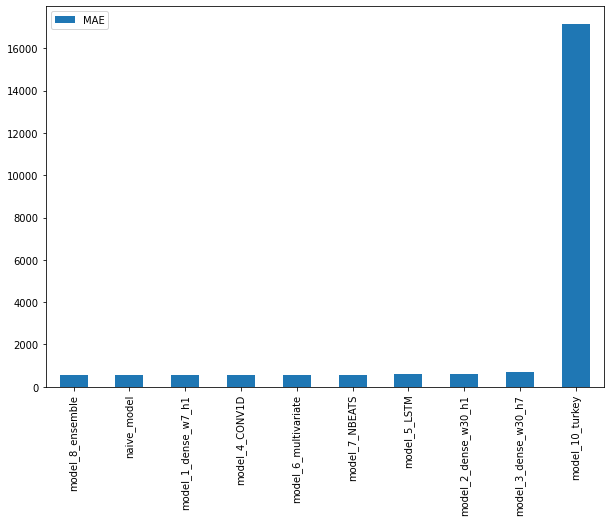

In [193]:
# Sort model results by MAE and plot them
model_results[['MAE']].sort_values(by='MAE').plot(figsize=(10, 7), kind='bar')

## Extra stuff

### Making the model that trains on future predictions

In [161]:
def get_model(horizon=HORIZON):
  model = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON)
  ])

  model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())
  return model

In [162]:
# Create function for sliding window
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1d array to 2d array of sequential labeled window sizes with horizon size labels
  """
  # 1. Create a window of specific size
  window_steps = np.expand_dims(np.arange(window_size+horizon), axis=0)
  
  # 2. Use numpy indexing to create 2d array of multiple window steps
  window_indexes = window_steps + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  
  #print(f'Window indexes:\n {window_indexes} {window_indexes.shape}')

  # 3. Index on the target array with 2d array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labeled windows
  windows, labels = get_labeled_window(windowed_array)
  return windows, labels

In [163]:
full_windows, full_labels = make_windows(tf.squeeze(y_all).numpy(), window_size=WINDOW_SIZE, horizon=HORIZON)

In [164]:
full_windows.shape, X_all.shape, full_labels.shape, y_all.shape

((2773, 7), (2780, 7), (2773, 1), (2780,))

In [165]:
def pred_model_run(prices, model, into_future, window_size, horizon, epochs):
  
  last_window = prices[-window_size:]
  future_forecast = []
  
  x, y = make_windows(prices, window_size=window_size, horizon=horizon)

  for _ in range(into_future):
    #print(x[-1])
    #print(y[-1])
    model.fit(x=x, y=y, epochs=epochs, verbose=0)

    future_preds = model.predict(tf.expand_dims(last_window, axis=0))

    #print(f'Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_preds).numpy()}\n')

    future_forecast.append(tf.squeeze(future_preds).numpy())
    
    prices = np.append(prices, future_preds)[1:]

    x, y = make_windows(prices, window_size=window_size, horizon=horizon)
    
    last_window = np.append(last_window, future_preds)[-window_size:]

  return model, future_forecast



In [166]:
trained_model, future_forecast = pred_model_run(prices=prices,
                               model=get_model(horizon=1),
                               window_size=WINDOW_SIZE,
                               horizon=HORIZON,
                               epochs=10,
                               into_future=14)


In [167]:
future_forecast

[42734.938,
 40816.645,
 39383.67,
 38723.836,
 38143.15,
 36642.168,
 35730.19,
 35552.113,
 34985.38,
 35002.16,
 35066.695,
 35371.62,
 34312.39,
 34753.77]

In [168]:
last_timestep = bitcoin_prices.index[-1]
future_date = get_future_date(last_timestep, into_future=INTO_FUTURE)

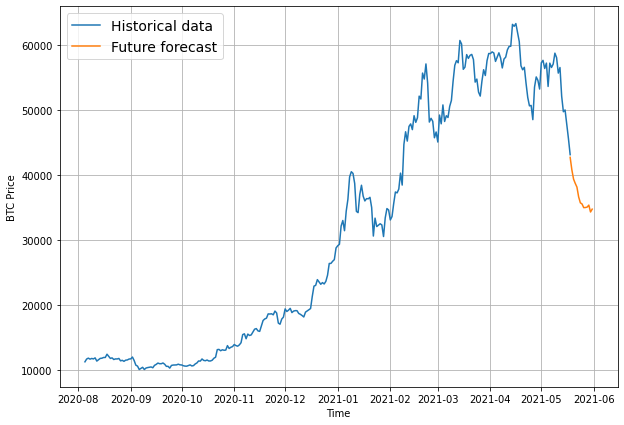

In [169]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=bitcoin_prices.index, values=btc_price, format='-', start=2500, label='Historical data')
plot_time_series(timesteps=future_date, values=future_forecast, format='-', label='Future forecast')

In [170]:
trained_model, future_forecast = pred_model_run(prices=prices,
                               model=get_model(horizon=1),
                               window_size=WINDOW_SIZE,
                               horizon=HORIZON,
                               epochs=10,
                               into_future=100)

In [171]:
future_date = get_future_date(last_timestep, into_future=100)

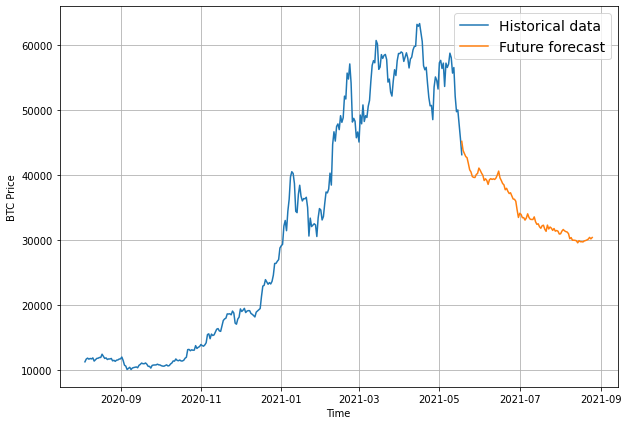

In [172]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=bitcoin_prices.index, values=btc_price, format='-', start=2500, label='Historical data')
plot_time_series(timesteps=future_date, values=future_forecast, format='-', label='Future forecast')